# EDA and Preprocessing the Dataset

Imports

In [583]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Dataset

In [584]:
score_df = pd.read_csv("Dataset//raw_data.csv")

C:\Users\Sameed\AppData\Local\Temp\ipykernel_8080\456297215.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  score_df = pd.read_csv("Dataset//raw_data.csv")


EDA

In [585]:
score_df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [586]:
score_df.shape

(100000, 28)

In [587]:
score_df.dtypes


ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [588]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [927]:
score_df.describe()

level_0         index          Age  Annual_Income  \
count  4258.000000   4258.000000  4258.000000    4258.000000   
mean   2128.500000  52779.765148     0.515797       0.387159   
std    1229.323052  29146.028431     0.262967       0.344032   
min       0.000000      9.000000     0.000000       0.000000   
25%    1064.250000  27418.250000     0.285714       0.089703   
50%    2128.500000  55026.000000     0.500000       0.248772   
75%    3192.750000  77929.750000     0.738095       0.691338   
max    4257.000000  99964.000000     1.000000       1.000000   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count            4258.000000        4258.000000      4258.000000   
mean                0.273224           0.343421         0.350399   
std                 0.202670           0.273447         0.284930   
min                 0.000000           0.000000         0.000000   
25%                 0.117873           0.142857         0.000000   
50%                 0.226063           0.285714         0.400000   
75%                 0.373666           0.571429         0.600000   
max                 1.000000           1.000000         1.000000   

       Interest_Rate  Num_of_Loan  Delay_from_due_date  \
count    4258.000000       4258.0          4258.000000   
mean        0.356549          0.0             0.395397   
std         0.298415          0.0             0.234956   
min         0.000000          0.0             0.000000   
25%         0.062500          0.0             0.200000   
50%         0.312500          0.0             0.371429   
75%         0.562500          0.0             0.571429   
max         1.000000          0.0             1.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count             4258.000000           4258.000000           4258.000000   
mean                 0.463782              0.319208              0.273074   
std                  0.238822              0.185500              0.199503   
min                  0.000000              0.000000              0.000000   
25%                  0.304348              0.174784              0.083333   
50%                  0.478261              0.313826              0.250000   
75%                  0.652174              0.437058              0.333333   
max                  1.000000              1.000000              1.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
count       4258.000000               4258.000000          4258.000000   
mean           0.500524                  0.400097             0.254780   
std            0.293424                  0.186488             0.218216   
min            0.000000                  0.000000             0.000000   
25%            0.239252                  0.248134             0.084772   
50%            0.501813                  0.400771             0.172399   
75%            0.761590                  0.549801             0.385597   
max            1.000000                  1.000000             1.000000   

       Amount_invested_monthly  
count              4258.000000  
mean                  0.329440  
std                   0.225711  
min                   0.000000  
25%                   0.157385  
50%                   0.265767  
75%                   0.442320  
max                   1.000000

In [590]:
# #Removing useless features

dropping = ["ID","Customer_ID","Name","SSN","Month"]
score_df.drop(dropping, inplace=True, axis=1)


In [591]:
score_df.head()

Age Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0    23  Scientist      19114.12            1824.843333                  3   
1    23  Scientist      19114.12                    NaN                  3   
2  -500  Scientist      19114.12                    NaN                  3   
3    23  Scientist      19114.12                    NaN                  3   
4    23  Scientist      19114.12            1824.843333                  3   

   Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                4              3           4   
1                4              3           4   
2                4              3           4   
3                4              3           4   
4                4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

   ... Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0  ...          _           809.98                 26.822620   
1  ...       Good           809.98                 31.944960   
2  ...       Good           809.98                 28.609352   
3  ...       Good           809.98                 31.377862   
4  ...       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good  

[5 rows x 23 columns]

Fixing datatypes and removing any unnecessary characters

In [592]:
# score_df.dtypes["Age"]
score_df["Age"] = score_df["Age"].str.replace('_', '')

#Cleaned columnn and casted int
score_df["Age"] = score_df["Age"].astype(np.int64)
score_df.dtypes["Age"]



dtype('int64')

In [593]:

# print(score_df.dtypes["Annual_Income"])
score_df["Annual_Income"] = score_df["Annual_Income"].str.replace('_', '')

#Cleaned columnn and casted int
score_df["Annual_Income"] = score_df["Annual_Income"].astype(np.float64)
score_df.dtypes["Annual_Income"]



dtype('float64')

In [594]:
score_df.dtypes["Num_of_Loan"]


score_df["Num_of_Loan"] = score_df["Num_of_Loan"].str.replace('_', '')

#Cleaned columnn and casted int
score_df["Num_of_Loan"] = score_df["Num_of_Loan"].astype(np.int64)
score_df.dtypes["Num_of_Loan"]

dtype('int64')

In [595]:
score_df.dtypes["Num_of_Delayed_Payment"]

score_df["Num_of_Delayed_Payment"] = score_df["Num_of_Delayed_Payment"].str.replace('_', '')


#Cleaned columnn and casted int
score_df["Num_of_Delayed_Payment"] = score_df["Num_of_Delayed_Payment"].astype(np.float64)
score_df.dtypes["Num_of_Delayed_Payment"]


dtype('float64')

In [596]:
score_df.dtypes["Changed_Credit_Limit"]

score_df["Changed_Credit_Limit"] = score_df["Changed_Credit_Limit"].str.replace('_', '')
score_df["Changed_Credit_Limit"] = score_df["Changed_Credit_Limit"].replace({"":None})



#Cleaned columnn and casted int
score_df["Changed_Credit_Limit"] = score_df["Changed_Credit_Limit"].astype(np.float64)
score_df.dtypes["Changed_Credit_Limit"]


dtype('float64')

In [597]:
score_df.loc[:,"Delay_from_due_date":].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Delay_from_due_date       100000 non-null  int64  
 1   Num_of_Delayed_Payment    92998 non-null   float64
 2   Changed_Credit_Limit      97909 non-null   float64
 3   Num_Credit_Inquiries      98035 non-null   float64
 4   Credit_Mix                100000 non-null  object 
 5   Outstanding_Debt          100000 non-null  object 
 6   Credit_Utilization_Ratio  100000 non-null  float64
 7   Credit_History_Age        90970 non-null   object 
 8   Payment_of_Min_Amount     100000 non-null  object 
 9   Total_EMI_per_month       100000 non-null  float64
 10  Amount_invested_monthly   95521 non-null   object 
 11  Payment_Behaviour         100000 non-null  object 
 12  Monthly_Balance           98800 non-null   object 
 13  Credit_Score              100000 non-null  ob

In [598]:
score_df.loc[:,"Delay_from_due_date":].head()

Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
0                    3                     7.0                 11.27   
1                   -1                     NaN                 11.27   
2                    3                     7.0                   NaN   
3                    5                     4.0                  6.27   
4                    6                     NaN                 11.27   

   Num_Credit_Inquiries Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0                   4.0          _           809.98                 26.822620   
1                   4.0       Good           809.98                 31.944960   
2                   4.0       Good           809.98                 28.609352   
3                   4.0       Good           809.98                 31.377862   
4                   4.0       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good

In [599]:
score_df.dtypes["Outstanding_Debt"]

score_df["Outstanding_Debt"] = score_df["Outstanding_Debt"].str.replace('_', '')


# #Cleaned columnn and casted int
score_df["Outstanding_Debt"] = score_df["Outstanding_Debt"].astype(np.float64)
score_df.dtypes["Outstanding_Debt"]


dtype('float64')

In [600]:
score_df.dtypes["Amount_invested_monthly"]

score_df["Amount_invested_monthly"] = score_df["Amount_invested_monthly"].str.replace('_', '')


# #Cleaned columnn and casted int
score_df["Amount_invested_monthly"] = score_df["Amount_invested_monthly"].astype(np.float64)
score_df.dtypes["Amount_invested_monthly"]


dtype('float64')

In [601]:

 score_df.dtypes["Monthly_Balance"]

score_df["Monthly_Balance"] = score_df["Monthly_Balance"].str.replace('_', '')


# #Cleaned columnn and casted int
score_df["Monthly_Balance"] = score_df["Monthly_Balance"].astype(np.float64)
score_df.dtypes["Monthly_Balance"]

dtype('float64')

In [602]:
#Removed unnecsary characters and corrected data types

score_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

### EDA and cleaning outliers etc

---------------
#### Age

38      2994
28      2968
31      2955
26      2945
32      2884
        ... 
1908       1
4583       1
7549       1
3119       1
1342       1
Name: Age, Length: 1728, dtype: int64


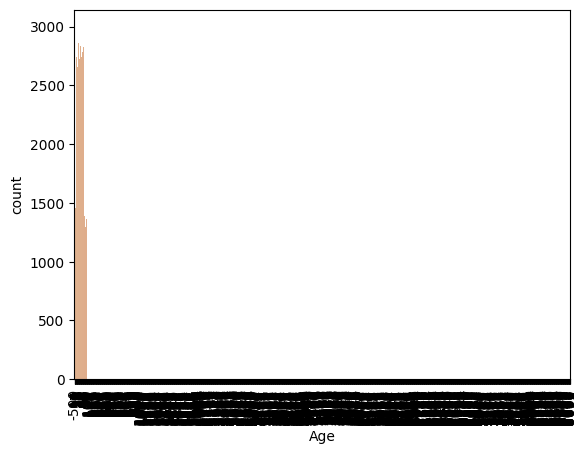

In [603]:
feature = "Age"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=90);

38     2994
28     2968
31     2955
26     2945
32     2884
36     2868
35     2866
25     2861
27     2859
39     2846
34     2837
44     2824
19     2793
41     2785
22     2785
20     2744
37     2742
29     2735
43     2734
30     2727
21     2716
24     2714
23     2654
45     2642
40     2609
42     2577
33     2543
18     2385
46     1621
15     1574
17     1502
16     1455
48     1385
49     1375
55     1366
52     1356
53     1354
54     1311
51     1291
50     1273
47     1227
14     1175
56      362
95        3
99        1
100       1
Name: Age, dtype: int64


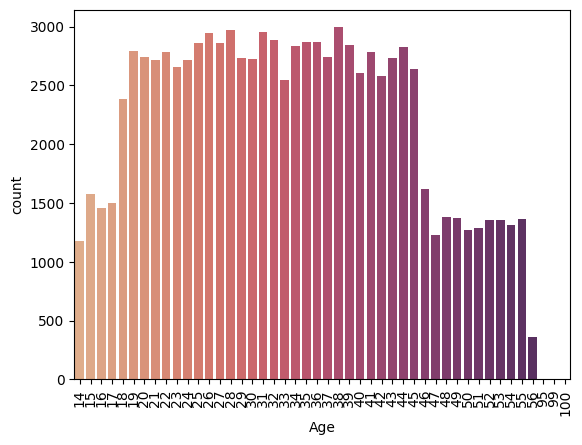

In [604]:
#Filtered out ages that were not in the range of 10 - 100
score_df = score_df[(score_df[feature] >= 10) & (score_df[feature] <= 100)]

print(score_df[feature].value_counts())
sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Rug / density Plot')

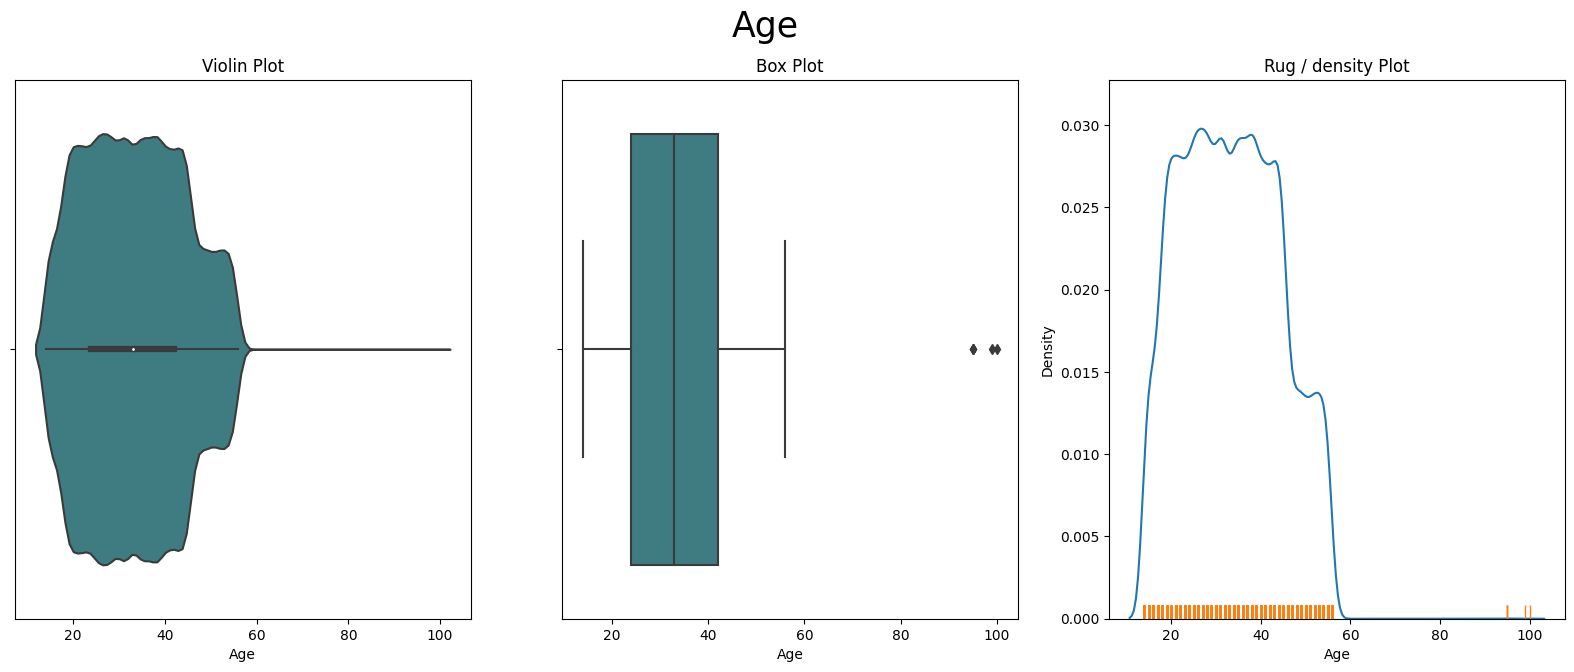

In [605]:

figure, axis = plt.subplots(1, 3,figsize=(20, 7))
figure.suptitle(feature, fontsize=25)

v = sns.violinplot(score_df, x=feature, ax=axis[0], palette='crest')
v.set_title("Violin Plot")

b = sns.boxplot(score_df, x=feature, ax=axis[1], palette='crest')
b.set_title("Box Plot")


r = sns.kdeplot(score_df, x=feature,ax=axis[2])
sns.rugplot(score_df, x=feature,ax=axis[2])
r.set_title("Rug / density Plot")


---------------
#### Occupation

_______          6873
Lawyer           6389
Architect        6175
Engineer         6172
Scientist        6113
Accountant       6110
Mechanic         6099
Media_Manager    6068
Teacher          6049
Developer        6031
Entrepreneur     6015
Doctor           5916
Journalist       5906
Manager          5807
Musician         5760
Writer           5741
Name: Occupation, dtype: int64


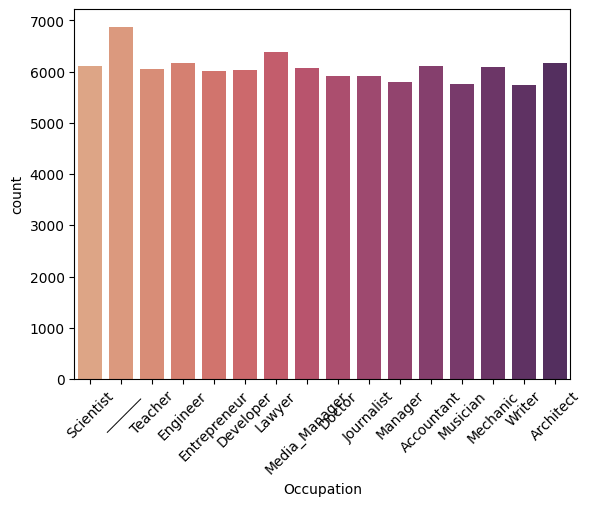

In [606]:
feature = "Occupation"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

Lawyer           6389
Architect        6175
Engineer         6172
Scientist        6113
Accountant       6110
Mechanic         6099
Media_Manager    6068
Teacher          6049
Developer        6031
Entrepreneur     6015
Doctor           5916
Journalist       5906
Manager          5807
Musician         5760
Writer           5741
Name: Occupation, dtype: int64


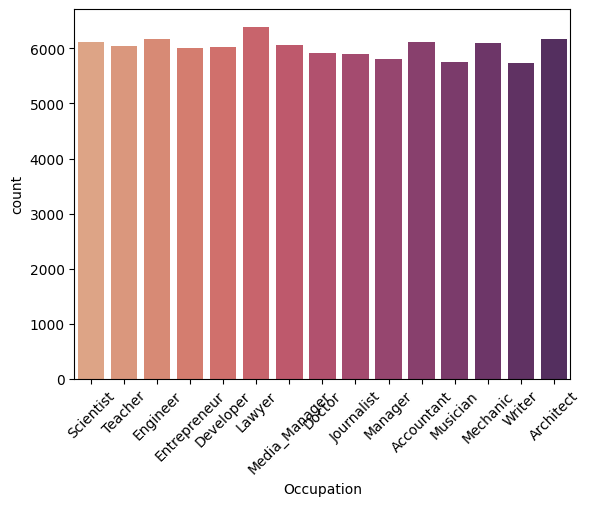

In [607]:
score_df = score_df[score_df[feature] != "_______"]

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

---------------
#### Annual Income

36585.12       16
40341.16       15
17816.75       15
109945.32      15
9141.63        14
               ..
16324358.00     1
8775585.00      1
9950314.00      1
11641815.00     1
5548111.00      1
Name: Annual_Income, Length: 13385, dtype: int64


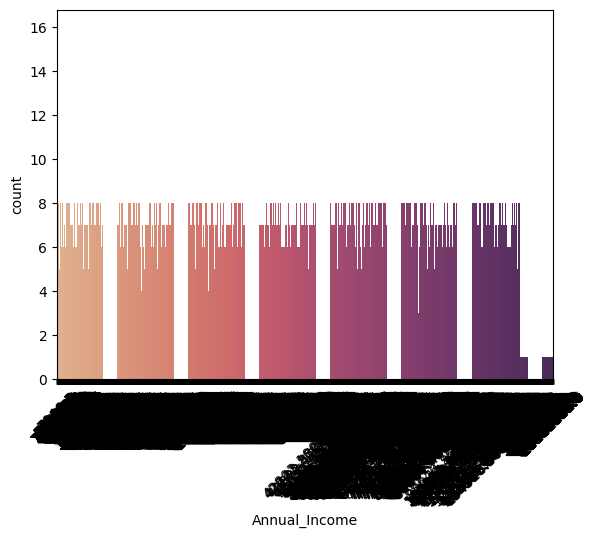

In [608]:
feature = "Annual_Income"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);


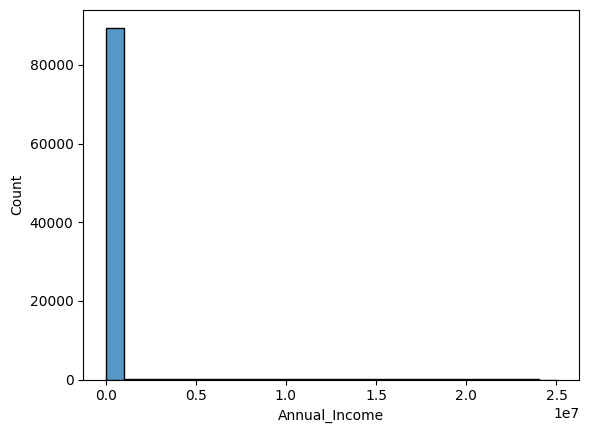

In [609]:
sns.histplot(data=score_df,x=feature,binwidth=1000000);

In [610]:
print(score_df[feature].skew())
score_df[feature].describe()

12.513710155730847


count    9.035100e+04
mean     1.766428e+05
std      1.432912e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.758034e+04
75%      7.288608e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [611]:
#Using quantiles to fix the extreme outliers
q_10 = score_df[feature].quantile(0.10)
q_90 = score_df[feature].quantile(0.90)

print(q_10)
print(q_90)

score_df[feature] = np.where(score_df[feature] <q_10, q_10,score_df[feature])
score_df[feature] = np.where(score_df[feature] >q_90, q_90,score_df[feature])
print(score_df[feature].skew())

14293.11
113196.54
0.7177511933540874


113196.54    9039
14293.11     9037
36585.12       16
40341.16       15
109945.32      15
             ... 
44393.86        3
52410.50        3
77257.64        3
108064.48       3
20051.92        3
Name: Annual_Income, Length: 10096, dtype: int64


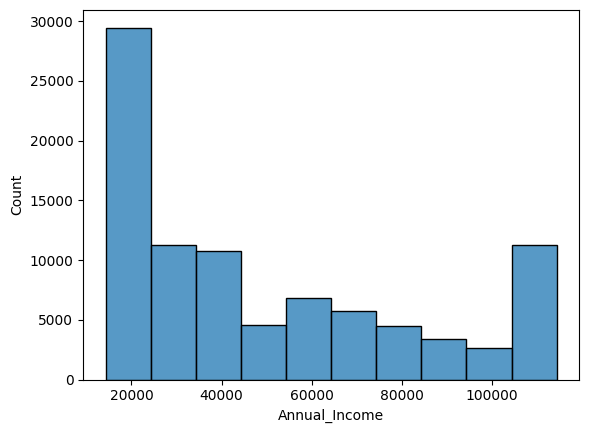

In [612]:
print(score_df[feature].value_counts())

sns.histplot(data=score_df,x=feature,binwidth=10000);

Text(0.5, 1.0, 'Rug / density Plot')

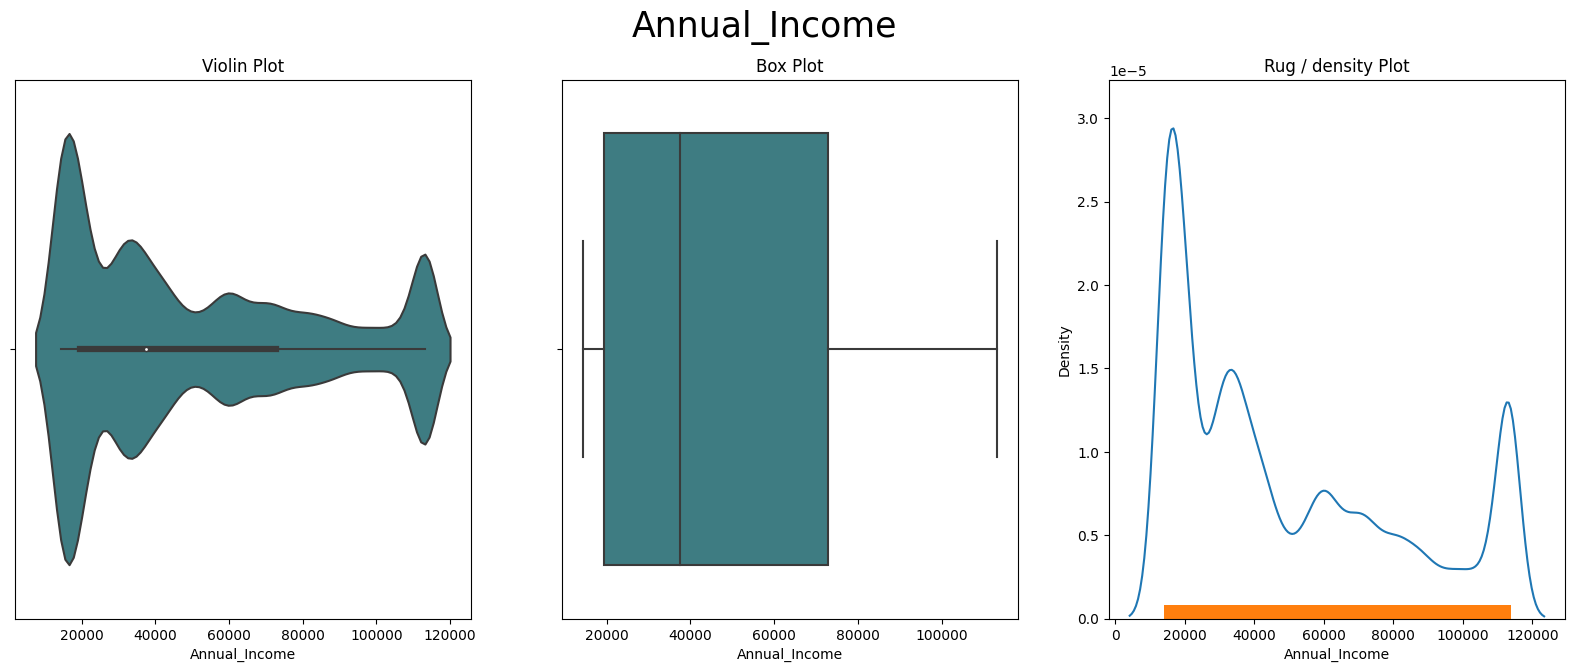

In [613]:

figure, axis = plt.subplots(1, 3,figsize=(20, 7))
figure.suptitle(feature, fontsize=25)

v = sns.violinplot(score_df, x=feature, ax=axis[0], palette='crest')
v.set_title("Violin Plot")

b = sns.boxplot(score_df, x=feature, ax=axis[1], palette='crest')
b.set_title("Box Plot")


r = sns.kdeplot(score_df, x=feature,ax=axis[2])
sns.rugplot(score_df, x=feature,ax=axis[2])
r.set_title("Rug / density Plot")


----------
#### Monthly_Inhand_Salary

6082.187500     15
2295.058333     14
3080.555000     14
6358.956667     14
4387.272500     13
                ..
4778.340000      1
6472.286396      1
10015.673333     1
1022.904167      1
3304.807427      1
Name: Monthly_Inhand_Salary, Length: 13205, dtype: int64


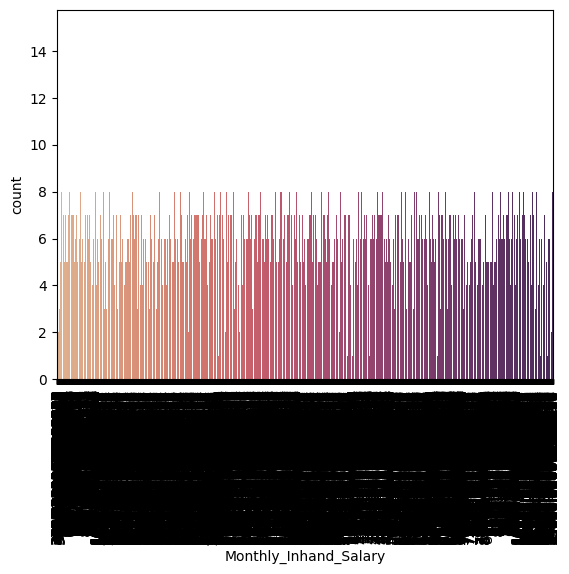

In [614]:
feature = "Monthly_Inhand_Salary"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=90);

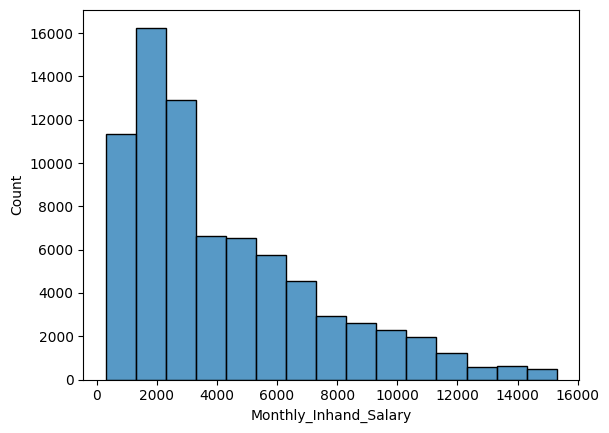

In [615]:
sns.histplot(data=score_df,x=feature,binwidth=1000);


In [616]:
print(score_df[feature].skew())
score_df[feature].describe()

1.1260219197153118


count    76787.000000
mean      4196.664045
std       3185.193573
min        303.645417
25%       1626.677917
50%       3093.153333
75%       5967.333333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

Text(0.5, 1.0, 'Rug / density Plot')

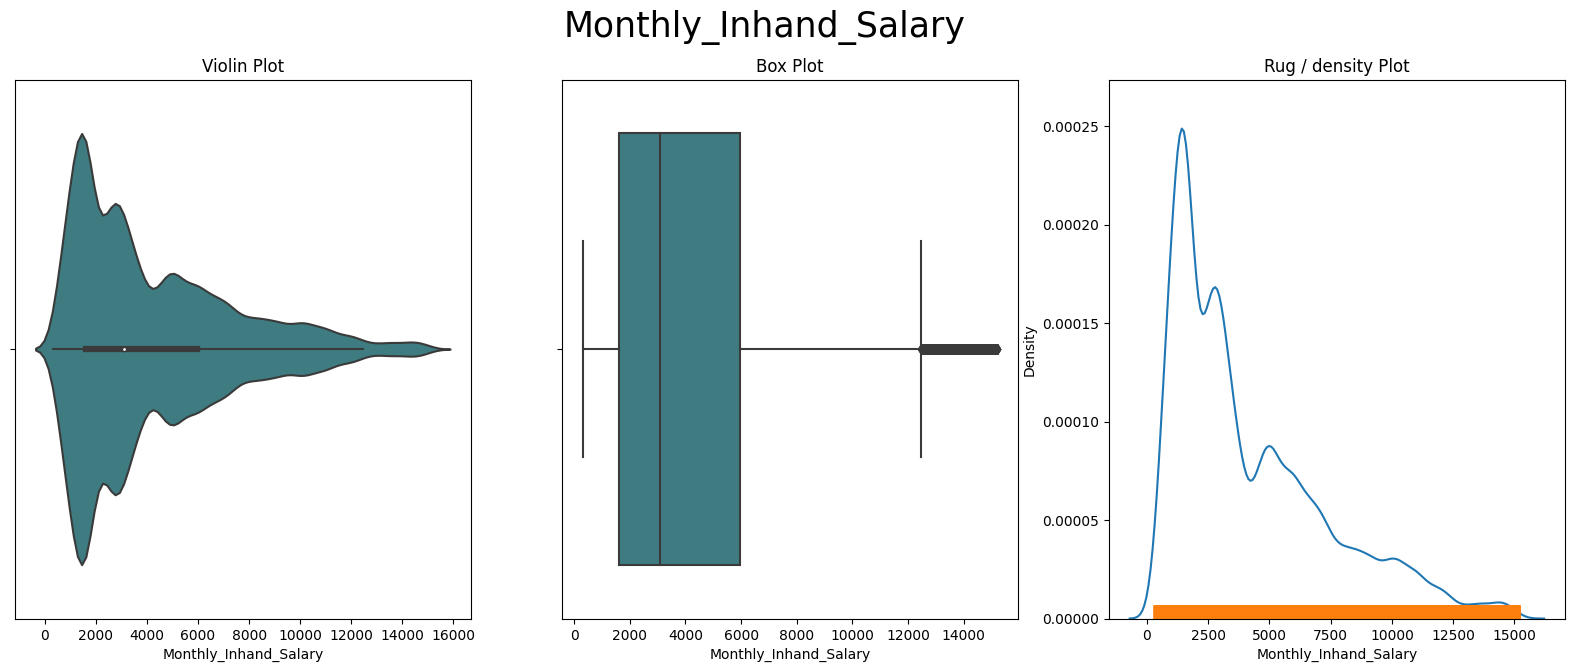

In [617]:

figure, axis = plt.subplots(1, 3,figsize=(20, 7))
figure.suptitle(feature, fontsize=25)

v = sns.violinplot(score_df, x=feature, ax=axis[0], palette='crest')
v.set_title("Violin Plot")

b = sns.boxplot(score_df, x=feature, ax=axis[1], palette='crest')
b.set_title("Box Plot")


r = sns.kdeplot(score_df, x=feature,ax=axis[2])
sns.rugplot(score_df, x=feature,ax=axis[2])
r.set_title("Rug / density Plot")


----------
#### Num_Bank_Accounts

6       11738
7       11625
8       11531
4       11014
5       10942
        ...  
406         1
1677        1
1567        1
785         1
182         1
Name: Num_Bank_Accounts, Length: 876, dtype: int64


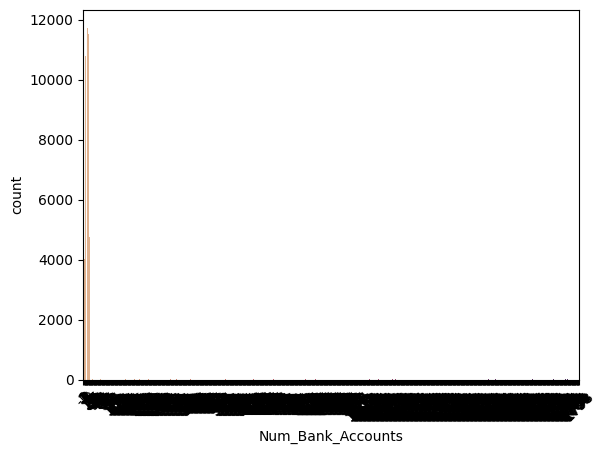

In [618]:
feature = "Num_Bank_Accounts"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);


In [619]:
print(score_df[feature].skew())
score_df[feature].describe()

11.232092439200878


count    90351.000000
mean        17.062456
std        117.619092
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [620]:
score_df = score_df[(score_df[feature] >= 0) & (score_df[feature] <= 200)]

q_10 = score_df[feature].quantile(0.10)
q_90 = score_df[feature].quantile(0.90)

print(q_10)
print(q_90)

score_df[feature] = np.where(score_df[feature] <q_10, q_10,score_df[feature])
score_df[feature] = np.where(score_df[feature] >q_90, q_90,score_df[feature])
print(score_df[feature].skew())


2.0
9.0
-0.011886213838880395


2.0    11834
6.0    11738
7.0    11625
8.0    11531
4.0    11014
5.0    10942
3.0    10785
9.0     9809
Name: Num_Bank_Accounts, dtype: int64


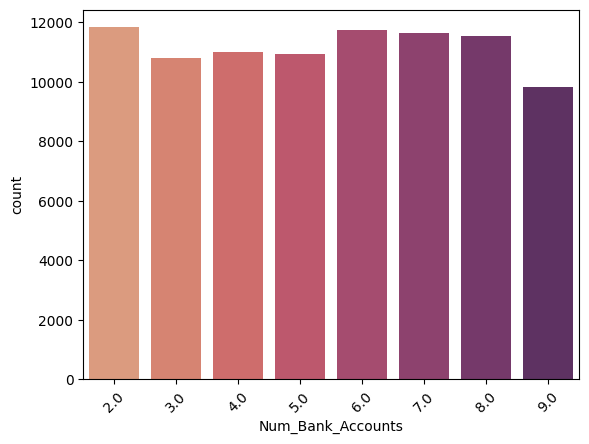

In [621]:
print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);


Text(0.5, 1.0, 'Rug / density Plot')

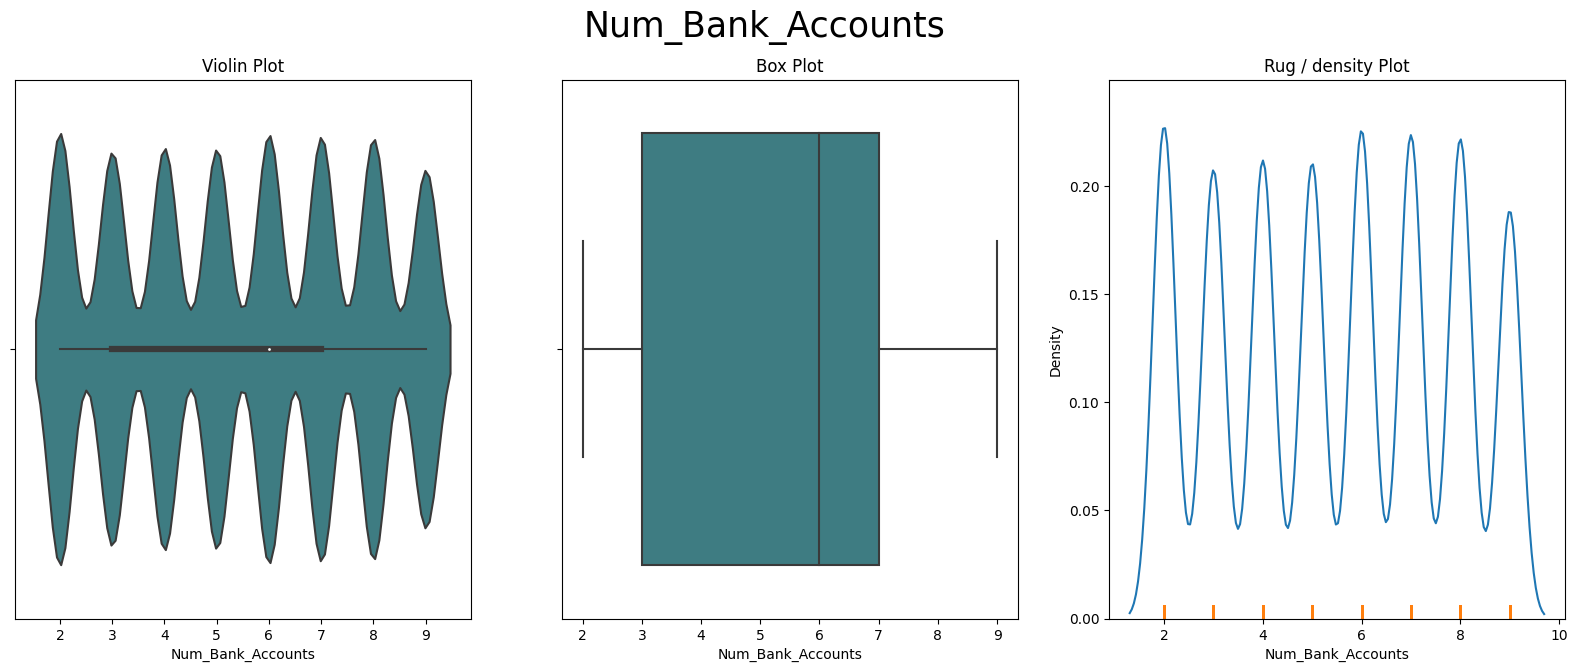

In [622]:

figure, axis = plt.subplots(1, 3,figsize=(20, 7))
figure.suptitle(feature, fontsize=25)

v = sns.violinplot(score_df, x=feature, ax=axis[0], palette='crest')
v.set_title("Violin Plot")

b = sns.boxplot(score_df, x=feature, ax=axis[1], palette='crest')
b.set_title("Box Plot")


r = sns.kdeplot(score_df, x=feature,ax=axis[2])
sns.rugplot(score_df, x=feature,ax=axis[2])
r.set_title("Rug / density Plot")


----------
#### Num_Credit_Card

5      16489
6      14813
7      14798
4      12537
3      11907
       ...  
658        1
700        1
204        1
175        1
679        1
Name: Num_Credit_Card, Length: 1123, dtype: int64


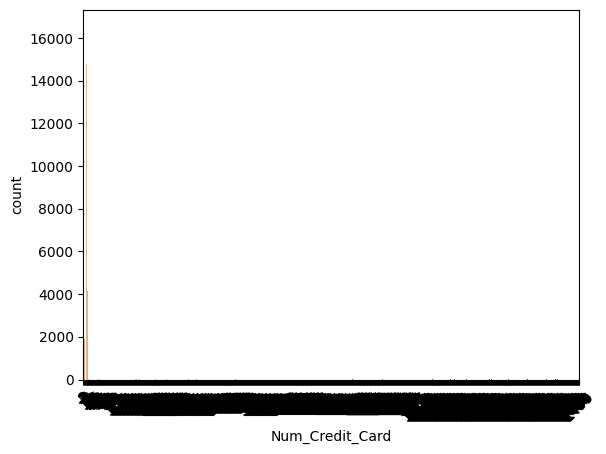

In [623]:
feature = "Num_Credit_Card"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);



In [624]:
print(score_df[feature].skew())
score_df[feature].describe()

8.461755395992157


count    89278.000000
mean        22.371222
std        128.309581
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max       1499.000000
Name: Num_Credit_Card, dtype: float64

In [625]:
score_df = score_df[(score_df[feature] >= 0) & (score_df[feature] <= 50)]


In [626]:
q_10 = score_df[feature].quantile(0.10)
q_90 = score_df[feature].quantile(0.90)

print(q_10)
print(q_90)

score_df[feature] = np.where(score_df[feature] <q_10, q_10,score_df[feature])
score_df[feature] = np.where(score_df[feature] >q_90, q_90,score_df[feature])
print(score_df[feature].skew())

3.0
8.0
0.002737538893142799


In [627]:
print(score_df[feature].skew())
score_df[feature].describe()

0.002737538893142799


count    87306.000000
mean         5.451447
std          1.686448
min          3.000000
25%          4.000000
50%          5.000000
75%          7.000000
max          8.000000
Name: Num_Credit_Card, dtype: float64

5.0    16489
3.0    15693
6.0    14813
7.0    14798
8.0    12976
4.0    12537
Name: Num_Credit_Card, dtype: int64


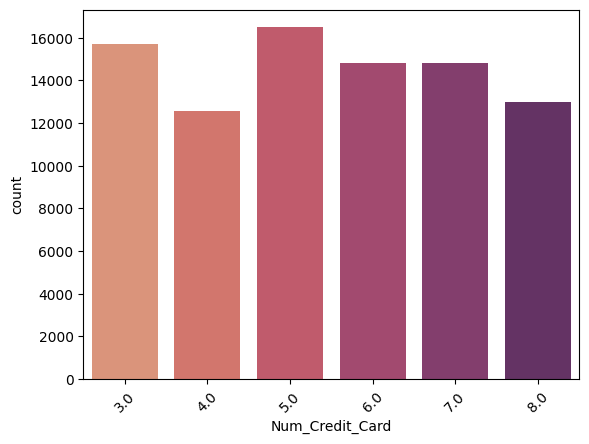

In [628]:
print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);


Text(0.5, 1.0, 'Rug / density Plot')

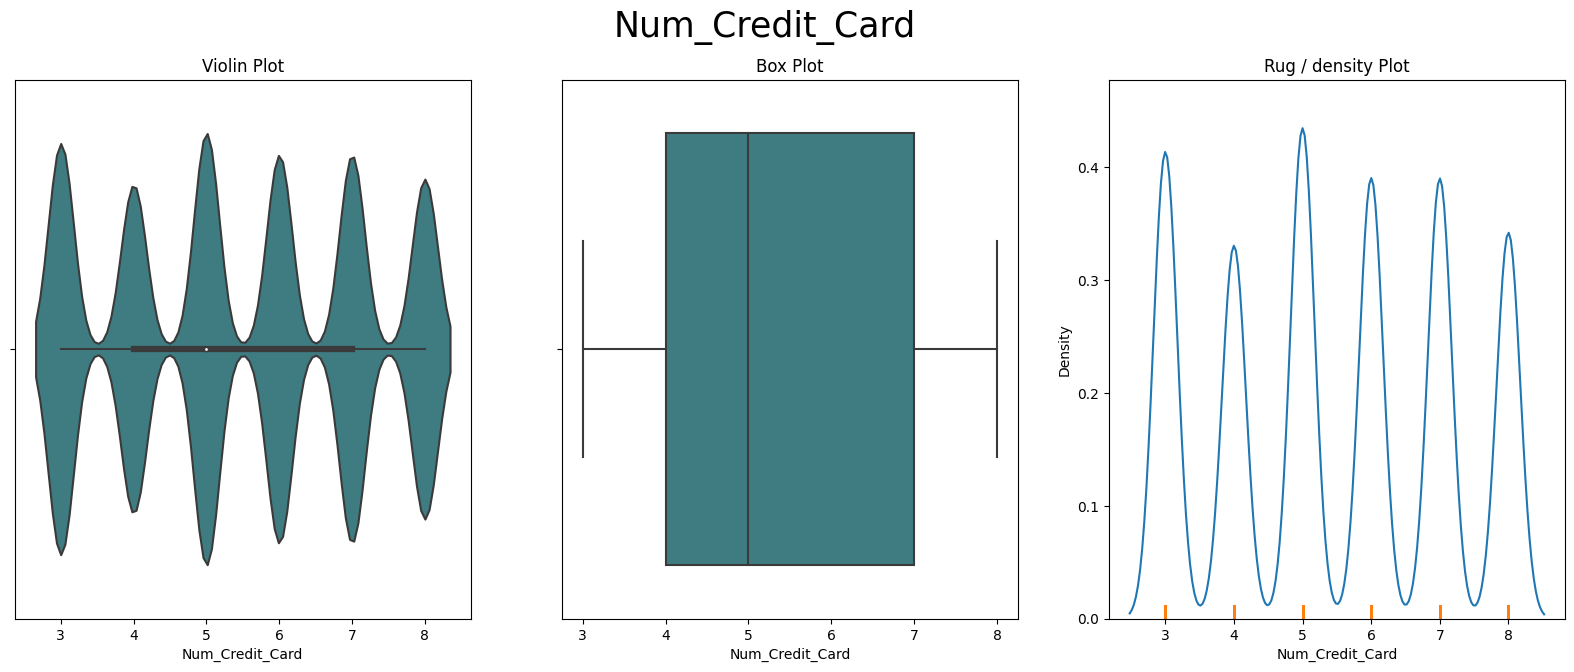

In [629]:
figure, axis = plt.subplots(1, 3,figsize=(20, 7))
figure.suptitle(feature, fontsize=25)

v = sns.violinplot(score_df, x=feature, ax=axis[0], palette='crest')
v.set_title("Violin Plot")

b = sns.boxplot(score_df, x=feature, ax=axis[1], palette='crest')
b.set_title("Box Plot")


r = sns.kdeplot(score_df, x=feature,ax=axis[2])
sns.rugplot(score_df, x=feature,ax=axis[2])
r.set_title("Rug / density Plot")

----------
#### Interest Rate

8       4370
5       4358
6       4160
10      3939
12      3933
        ... 
5762       1
243        1
4372       1
4905       1
5729       1
Name: Interest_Rate, Length: 1582, dtype: int64


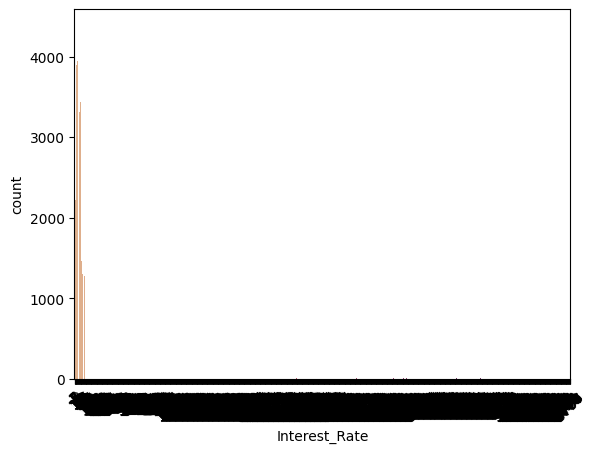

In [630]:
feature = "Interest_Rate"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);



In [631]:
print(score_df[feature].skew())
score_df[feature].describe()

8.894649121040793


count    87306.000000
mean        73.762227
std        471.942271
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max       5797.000000
Name: Interest_Rate, dtype: float64

In [632]:
score_df = score_df[(score_df[feature] >= 0) & (score_df[feature] <= 50)]

q_10 = score_df[feature].quantile(0.10)
q_90 = score_df[feature].quantile(0.90)

print(q_10)
print(q_90)

score_df[feature] = np.where(score_df[feature] <q_10, q_10,score_df[feature])
score_df[feature] = np.where(score_df[feature] >q_90, q_90,score_df[feature])


4.0
28.0


In [633]:
print(score_df[feature].skew())
score_df[feature].describe()

0.37454508445406837


count    85500.000000
mean        14.361520
std          7.882315
min          4.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         28.000000
Name: Interest_Rate, dtype: float64

28.0    9693
4.0     9130
8.0     4370
5.0     4358
6.0     4160
10.0    3939
12.0    3933
9.0     3929
7.0     3899
11.0    3868
18.0    3552
15.0    3486
20.0    3439
17.0    3309
16.0    3270
19.0    3203
13.0    2095
14.0    1960
22.0    1520
23.0    1466
24.0    1463
27.0    1403
25.0    1389
21.0    1363
26.0    1303
Name: Interest_Rate, dtype: int64


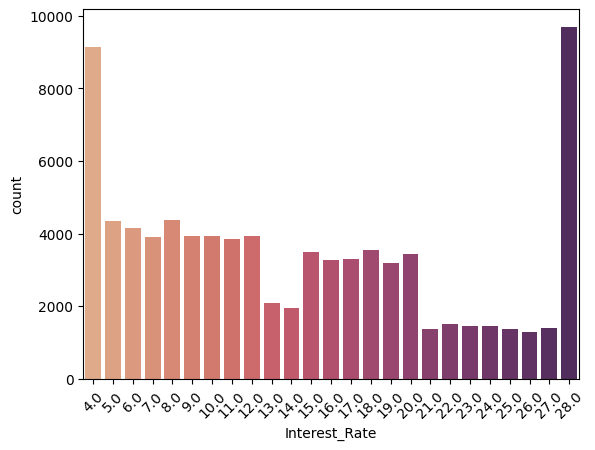

In [634]:
print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

Text(0.5, 1.0, 'Rug / density Plot')

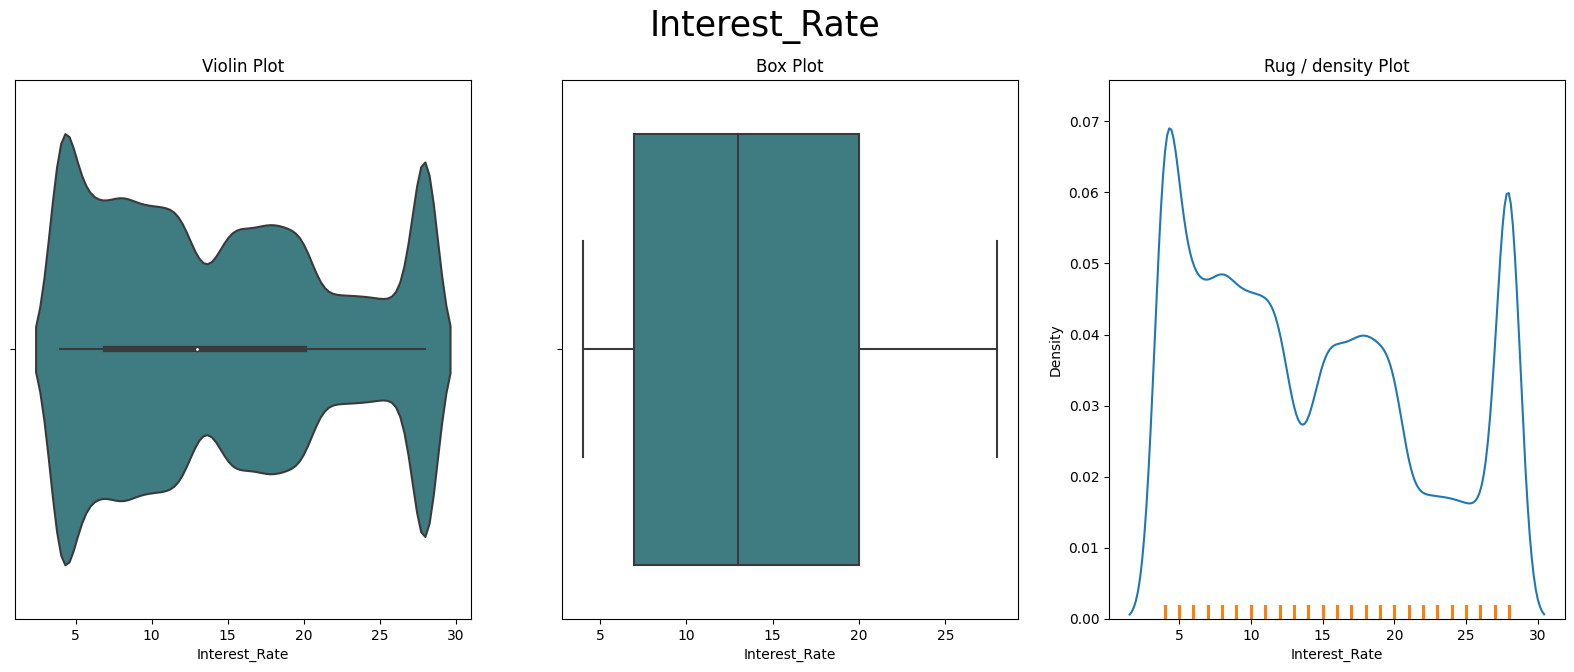

In [635]:
figure, axis = plt.subplots(1, 3,figsize=(20, 7))
figure.suptitle(feature, fontsize=25)

v = sns.violinplot(score_df, x=feature, ax=axis[0], palette='crest')
v.set_title("Violin Plot")

b = sns.boxplot(score_df, x=feature, ax=axis[1], palette='crest')
b.set_title("Box Plot")


r = sns.kdeplot(score_df, x=feature,ax=axis[2])
sns.rugplot(score_df, x=feature,ax=axis[2])
r.set_title("Rug / density Plot")

----------
#### Num of Loan

2      12905
3      12894
4      12687
0       9272
1       9035
       ...  
630        1
252        1
745        1
103        1
966        1
Name: Num_of_Loan, Length: 356, dtype: int64


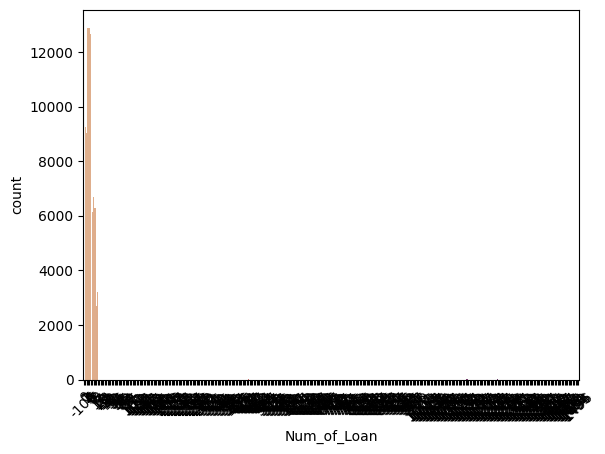

In [636]:
feature = "Num_of_Loan"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

In [637]:
print(score_df[feature].skew())
score_df[feature].describe()

16.132868075738255


count    85500.000000
mean         2.952912
std         61.993367
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64

In [638]:
score_df = score_df[(score_df[feature] >= 0) & (score_df[feature] <= 15)]


In [639]:
print(score_df[feature].skew())
score_df[feature].describe()

0.4463534945839346


count    81804.000000
mean         3.539240
std          2.446696
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan, dtype: float64

2    12905
3    12894
4    12687
0     9272
1     9035
6     6681
7     6289
5     6133
9     3211
8     2697
Name: Num_of_Loan, dtype: int64


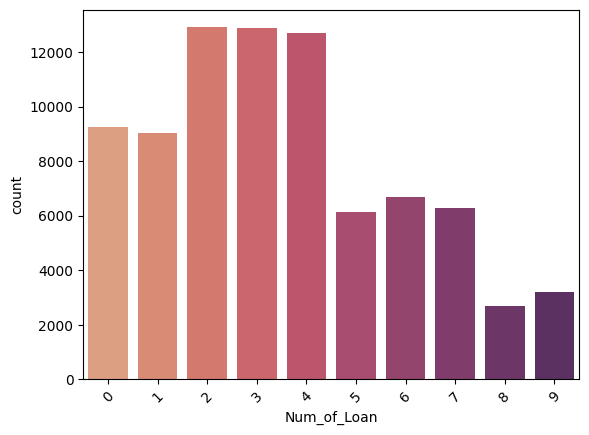

In [640]:
print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

Text(0.5, 1.0, 'Rug / density Plot')

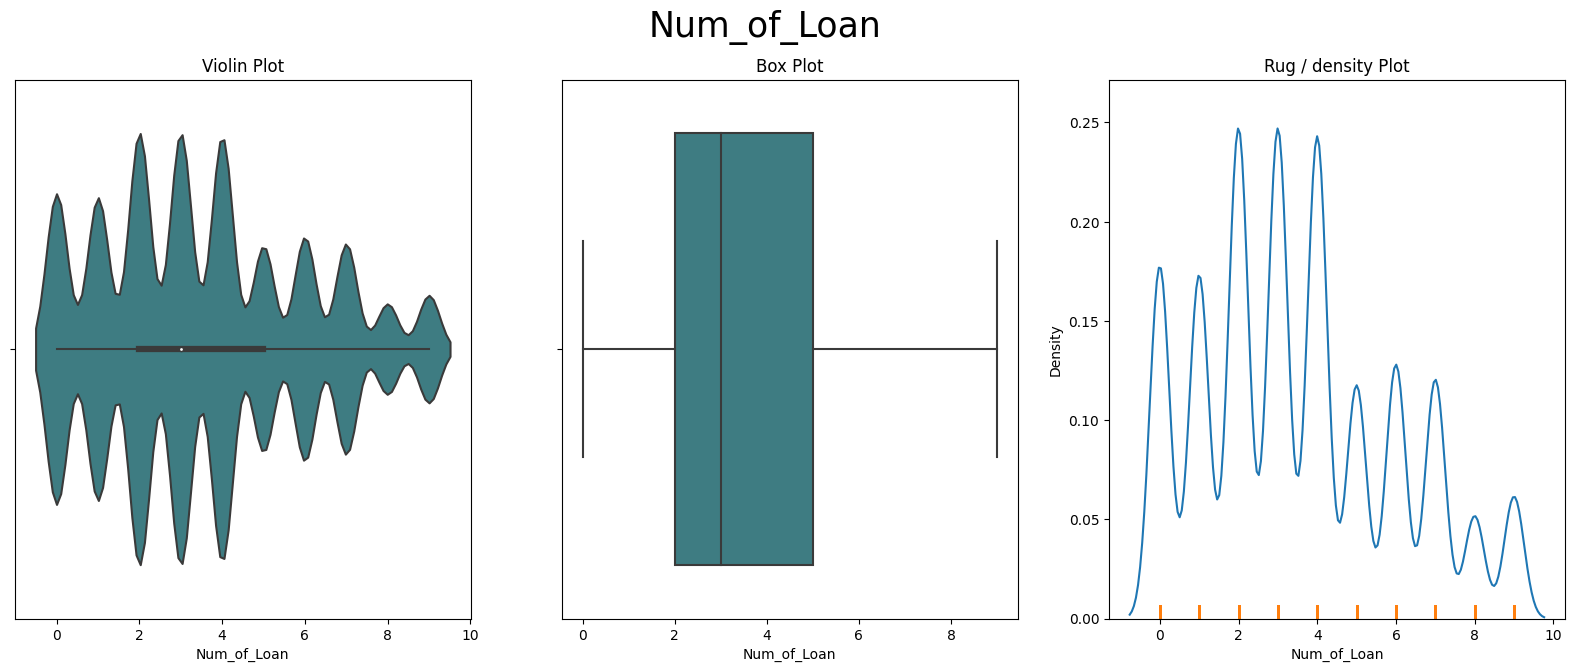

In [641]:
figure, axis = plt.subplots(1, 3,figsize=(20, 7))
figure.suptitle(feature, fontsize=25)

v = sns.violinplot(score_df, x=feature, ax=axis[0], palette='crest')
v.set_title("Violin Plot")

b = sns.boxplot(score_df, x=feature, ax=axis[1], palette='crest')
b.set_title("Box Plot")


r = sns.kdeplot(score_df, x=feature,ax=axis[2])
sns.rugplot(score_df, x=feature,ax=axis[2])
r.set_title("Rug / density Plot")

----------
#### Type of Loan

In [642]:
feature = "Type_of_Loan"

print(score_df[feature].value_counts())

score_df = score_df.loc[ score_df[feature].isin(["Not Specified","Personal Loan","Student Loan","Credit-Builder Loan","Debt Consolidation Loan",
"Payday Loan","Mortgage Loan","Auto Loan","Home Equity Loan"]) ]



Not Specified                                                                                                     1143
Personal Loan                                                                                                     1036
Student Loan                                                                                                      1027
Credit-Builder Loan                                                                                               1021
Debt Consolidation Loan                                                                                           1004
                                                                                                                  ... 
Credit-Builder Loan, Student Loan, Personal Loan, Not Specified, Payday Loan, and Auto Loan                          3
Not Specified, Payday Loan, Personal Loan, Not Specified, Personal Loan, Student Loan, and Credit-Builder Loan       3
Auto Loan, Not Specified, Not Specified, Auto Lo

Not Specified              1143
Personal Loan              1036
Student Loan               1027
Credit-Builder Loan        1021
Debt Consolidation Loan    1004
Payday Loan                 974
Mortgage Loan               958
Auto Loan                   939
Home Equity Loan            933
Name: Type_of_Loan, dtype: int64


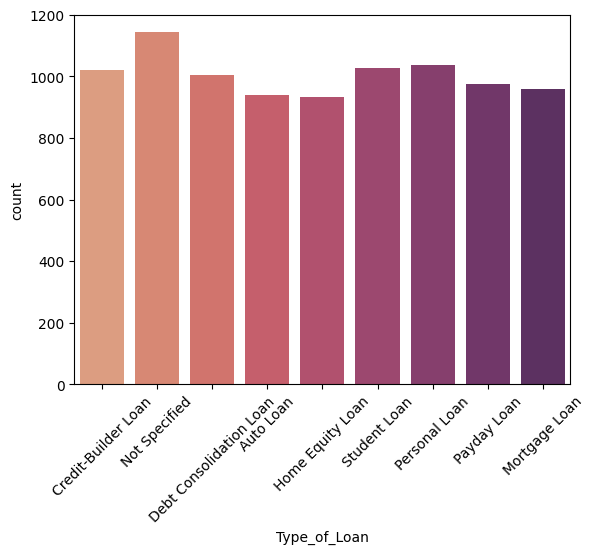

In [643]:
print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

----------
#### Delay From Due Date

 10    446
 7     431
 14    427
 13    425
 11    423
 8     423
 12    409
 5     398
 9     376
 15    369
 6     346
 3     327
 4     326
 18    297
 29    260
 17    255
 16    247
 21    222
 25    215
 20    214
 22    209
 2     208
 24    207
 19    199
 30    192
 23    191
 1     175
 26    169
 0     168
 28    155
 27    141
-1      36
-2      32
 31     31
 33     21
-3      15
 32     15
 34     12
-4      10
 35      7
-5       6
Name: Delay_from_due_date, dtype: int64


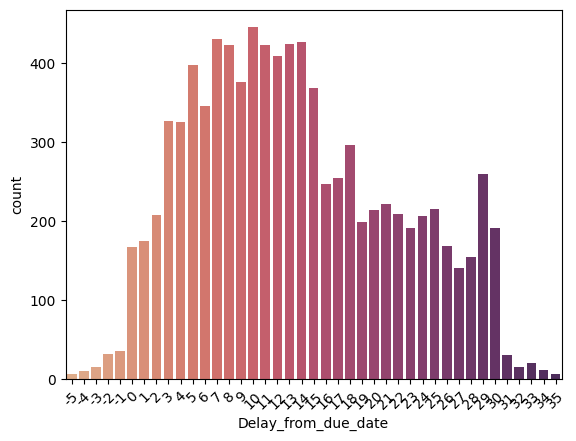

In [644]:
feature = "Delay_from_due_date"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

In [645]:
score_df = score_df[(score_df[feature] >= 0) & (score_df[feature] <= 50)]

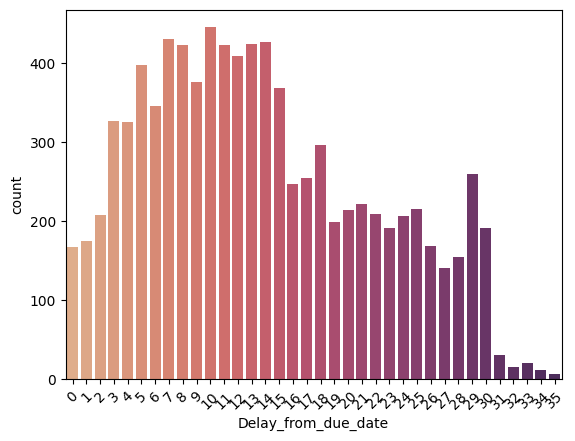

In [646]:

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

Text(0.5, 1.0, 'Rug / density Plot')

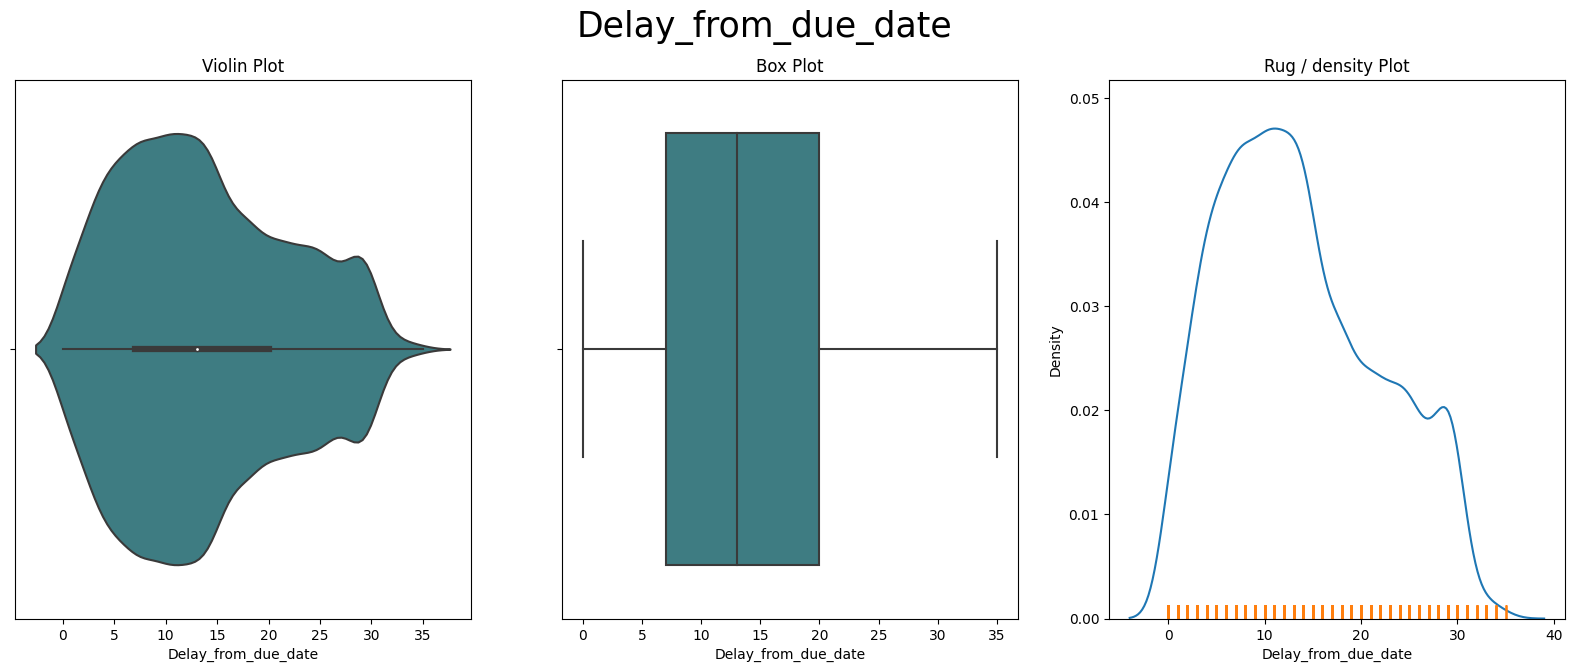

In [647]:
figure, axis = plt.subplots(1, 3,figsize=(20, 7))
figure.suptitle(feature, fontsize=25)

v = sns.violinplot(score_df, x=feature, ax=axis[0], palette='crest')
v.set_title("Violin Plot")

b = sns.boxplot(score_df, x=feature, ax=axis[1], palette='crest')
b.set_title("Box Plot")


r = sns.kdeplot(score_df, x=feature,ax=axis[2])
sns.rugplot(score_df, x=feature,ax=axis[2])
r.set_title("Rug / density Plot")

----------
#### Num of Delayed Payment

10.0      622
12.0      612
8.0       598
11.0      552
9.0       508
         ... 
52.0        1
2243.0      1
749.0       1
3845.0      1
86.0        1
Name: Num_of_Delayed_Payment, Length: 97, dtype: int64


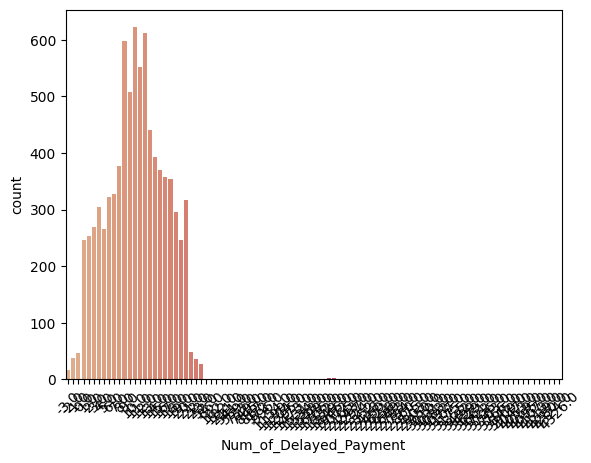

In [648]:
feature = "Num_of_Delayed_Payment"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

In [649]:
print(score_df[feature].skew())
score_df[feature].describe()

13.211808682072961


count    8316.000000
mean       31.242424
std       252.091630
min        -3.000000
25%         6.000000
50%        10.000000
75%        15.000000
max      4326.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [650]:
score_df = score_df[(score_df[feature] >= 0) & (score_df[feature] <= 50)]


In [651]:
print(score_df[feature].skew())
score_df[feature].describe()

-0.022763270818623095


count    8143.000000
mean       10.471325
std         5.470484
min         0.000000
25%         7.000000
50%        10.000000
75%        15.000000
max        23.000000
Name: Num_of_Delayed_Payment, dtype: float64

10.0    622
12.0    612
8.0     598
11.0    552
9.0     508
13.0    440
14.0    392
7.0     377
15.0    370
16.0    357
17.0    354
6.0     328
5.0     323
20.0    317
3.0     304
18.0    296
2.0     269
4.0     265
1.0     253
19.0    247
0.0     247
21.0     49
22.0     36
23.0     27
Name: Num_of_Delayed_Payment, dtype: int64


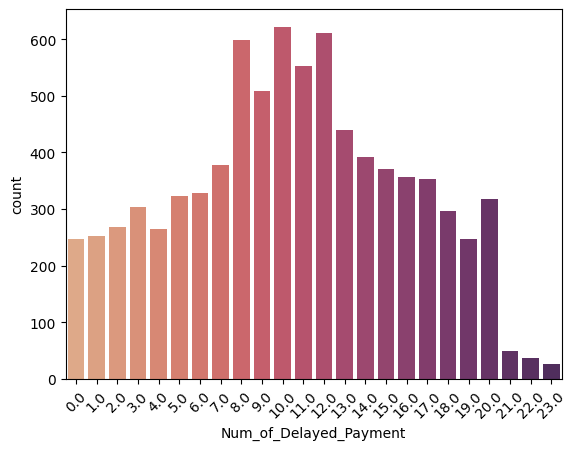

In [652]:
print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

Text(0.5, 1.0, 'Rug / density Plot')

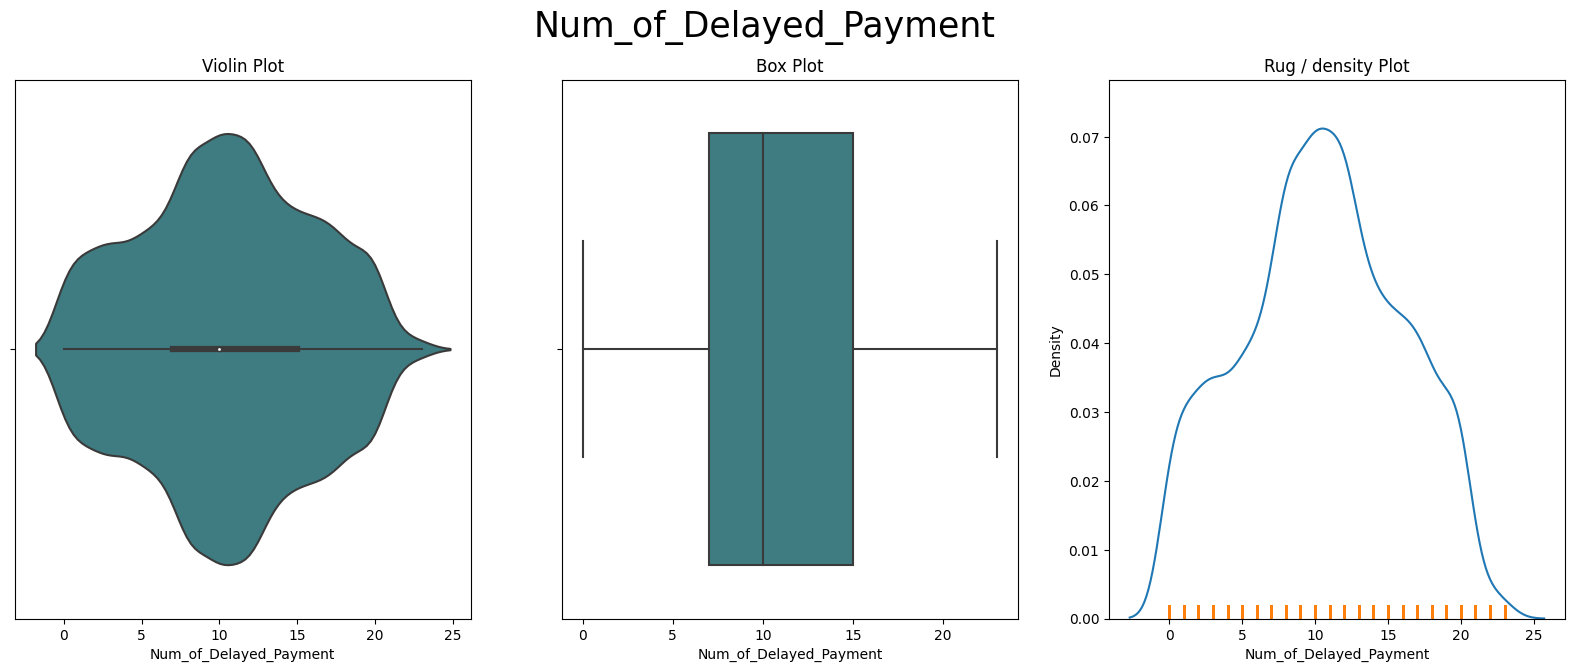

In [653]:
figure, axis = plt.subplots(1, 3,figsize=(20, 7))
figure.suptitle(feature, fontsize=25)

v = sns.violinplot(score_df, x=feature, ax=axis[0], palette='crest')
v.set_title("Violin Plot")

b = sns.boxplot(score_df, x=feature, ax=axis[1], palette='crest')
b.set_title("Box Plot")


r = sns.kdeplot(score_df, x=feature,ax=axis[2])
sns.rugplot(score_df, x=feature,ax=axis[2])
r.set_title("Rug / density Plot")

----------
#### Changed Credit Limit

11.35    26
4.55     26
11.82    24
7.73     24
7.77     23
         ..
3.48      1
0.48      1
17.86     1
9.53      1
5.10      1
Name: Changed_Credit_Limit, Length: 1664, dtype: int64


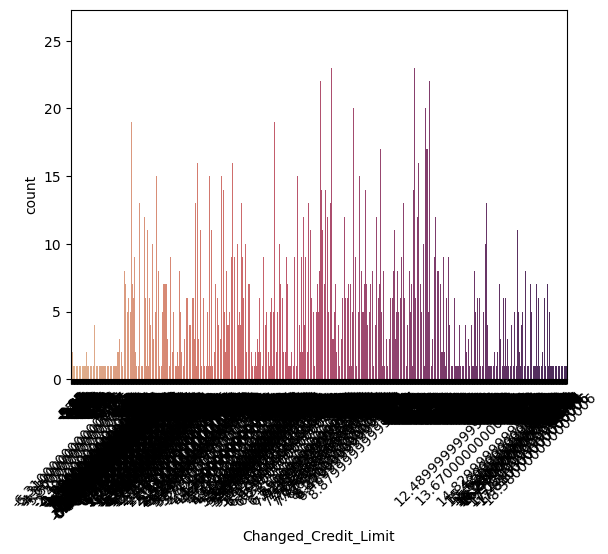

In [654]:
feature = "Changed_Credit_Limit"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

In [655]:
print(score_df[feature].skew())
score_df[feature].describe()

0.345130304229733


count    7966.000000
mean        7.828758
std         4.888849
min        -6.310000
25%         4.072500
50%         7.730000
75%        10.980000
max        26.620000
Name: Changed_Credit_Limit, dtype: float64

In [656]:
score_df = score_df[(score_df[feature] >= 0) & (score_df[feature] <= 50)]
print(score_df[feature].skew())
score_df[feature].describe()

0.49573915894034


count    7792.000000
mean        8.054539
std         4.694578
min         0.000000
25%         4.367500
50%         7.855000
75%        11.030000
max        26.620000
Name: Changed_Credit_Limit, dtype: float64

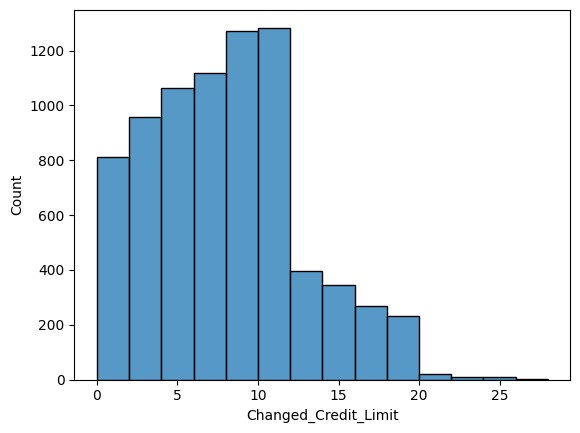

In [657]:
sns.histplot(data=score_df,x=feature,binwidth=2);

----------
#### Num Credit Inquiries

4.0       1410
3.0       1130
2.0       1120
1.0       1016
0.0        973
          ... 
754.0        1
957.0        1
1931.0       1
1871.0       1
762.0        1
Name: Num_Credit_Inquiries, Length: 139, dtype: int64


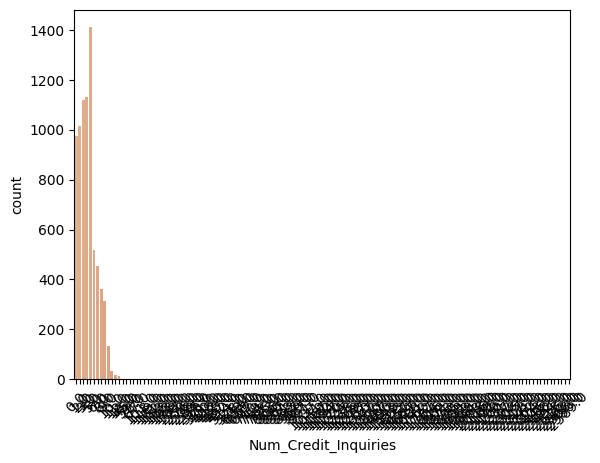

In [658]:
feature = "Num_Credit_Inquiries"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

In [659]:
print(score_df[feature].skew())
score_df[feature].describe()

10.023295814966573


count    7627.000000
mean       24.882785
std       193.482150
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max      2589.000000
Name: Num_Credit_Inquiries, dtype: float64

In [660]:
score_df = score_df[(score_df[feature] >= 0) & (score_df[feature] <= 12)]
print(score_df[feature].skew())
score_df[feature].describe()

0.6612792262767473


count    7496.000000
mean        3.275480
std         2.405523
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: Num_Credit_Inquiries, dtype: float64

4.0     1410
3.0     1130
2.0     1120
1.0     1016
0.0      973
5.0      519
6.0      452
7.0      361
8.0      315
9.0      134
10.0      34
11.0      17
12.0      15
Name: Num_Credit_Inquiries, dtype: int64


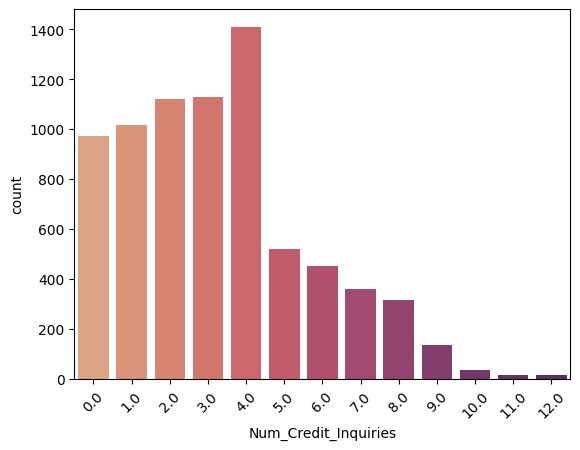

In [661]:
print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

Text(0.5, 1.0, 'Rug / density Plot')

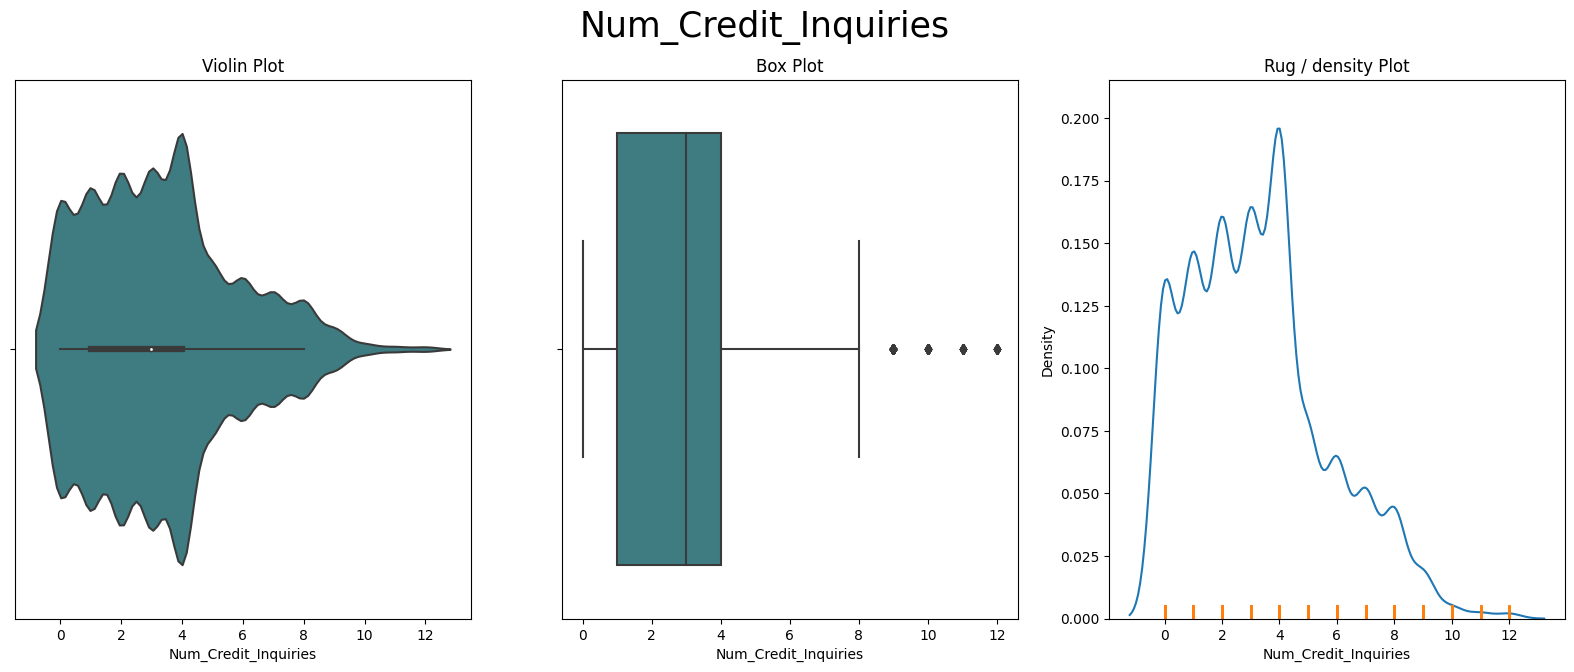

In [662]:
figure, axis = plt.subplots(1, 3,figsize=(20, 7))
figure.suptitle(feature, fontsize=25)

v = sns.violinplot(score_df, x=feature, ax=axis[0], palette='crest')
v.set_title("Violin Plot")

b = sns.boxplot(score_df, x=feature, ax=axis[1], palette='crest')
b.set_title("Box Plot")


r = sns.kdeplot(score_df, x=feature,ax=axis[2])
sns.rugplot(score_df, x=feature,ax=axis[2])
r.set_title("Rug / density Plot")

----------
#### Credit Mix

Good        3073
Standard    2960
_           1463
Name: Credit_Mix, dtype: int64


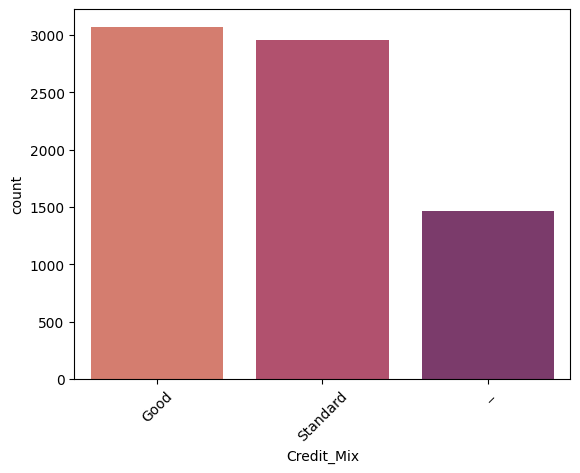

In [663]:
feature = "Credit_Mix"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

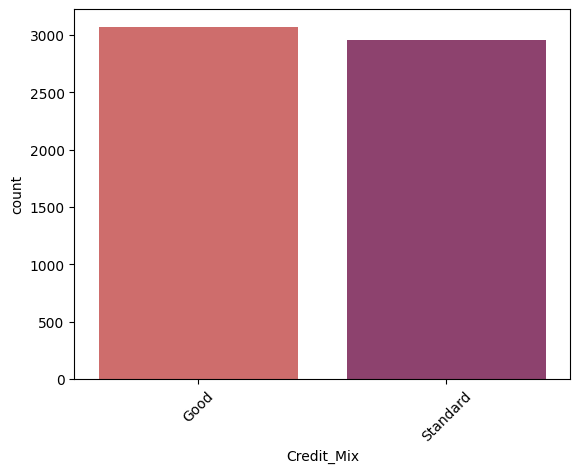

In [664]:
score_df = score_df[score_df[feature] != "_"]
sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

In [665]:
score_df

Age     Occupation  Annual_Income  Monthly_Inhand_Salary  \
9       28        Teacher       34847.84            3037.986667   
11      28        Teacher       34847.84                    NaN   
12      28        Teacher       34847.84            3037.986667   
13      28        Teacher       34847.84            3037.986667   
14      28        Teacher       34847.84                    NaN   
...    ...            ...            ...                    ...   
99947   33  Media_Manager       59146.36            4908.863333   
99949   33  Media_Manager       59146.36            4908.863333   
99951   33  Media_Manager       59146.36            4908.863333   
99960   18         Lawyer       42903.79            3468.315833   
99964   18         Lawyer       42903.79            3468.315833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
9                    2.0              4.0            6.0            1   
11                   2.0              4.0            6.0            1   
12                   2.0              4.0            6.0            1   
13                   2.0              4.0            6.0            1   
14                   2.0              4.0            6.0            1   
...                  ...              ...            ...          ...   
99947                2.0              5.0            6.0            1   
99949                3.0              6.0            6.0            1   
99951                3.0              6.0            6.0            1   
99960                2.0              4.0            6.0            1   
99964                2.0              4.0            6.0            1   

              Type_of_Loan  Delay_from_due_date  ...  Credit_Mix  \
9      Credit-Builder Loan                    7  ...        Good   
11     Credit-Builder Loan                    3  ...        Good   
12     Credit-Builder Loan                    3  ...        Good   
13     Credit-Builder Loan                    3  ...        Good   
14     Credit-Builder Loan                    3  ...        Good   
...                    ...                  ...  ...         ...   
99947        Personal Loan                    8  ...        Good   
99949        Personal Loan                    6  ...        Good   
99951        Personal Loan                    8  ...        Good   
99960        Not Specified                   14  ...        Good   
99964        Not Specified                   14  ...        Good   

       Outstanding_Debt  Credit_Utilization_Ratio      Credit_History_Age  \
9                605.03                 38.550848   26 Years and 8 Months   
11               605.03                 39.182656  26 Years and 10 Months   
12               605.03                 34.977895  26 Years and 11 Months   
13               605.03                 33.381010   27 Years and 0 Months   
14               605.03                 31.131702   27 Years and 1 Months   
...                 ...                       ...                     ...   
99947            418.03                 28.091458   20 Years and 4 Months   
99949            418.03                 24.975531   20 Years and 6 Months   
99951            418.03                 27.682186   20 Years and 8 Months   
99960           1079.48                 27.289440   28 Years and 1 Months   
99964           1079.48                 23.140640   28 Years and 5 Months   

       Payment_of_Min_Amount  Total_EMI_per_month Amount_invested_monthly  \
9                         No            18.816215               40.391238   
11                        No            18.816215               99.306228   
12                        No            18.816215              130.115420   
13                        No            18.816215               43.477190   
14                        NM            18.816215               70.101774   
...                      ...                  ...                     ...   
99947                     No            26.7

----------
#### Outstanding Debt

1413.55    9
55.20      9
156.76     9
935.74     9
1439.70    8
          ..
1142.05    1
571.65     1
382.04     1
632.29     1
441.46     1
Name: Outstanding_Debt, Length: 1375, dtype: int64


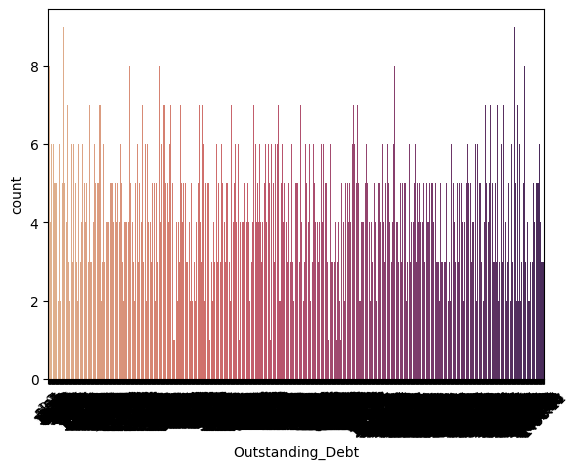

In [666]:
feature = "Outstanding_Debt"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

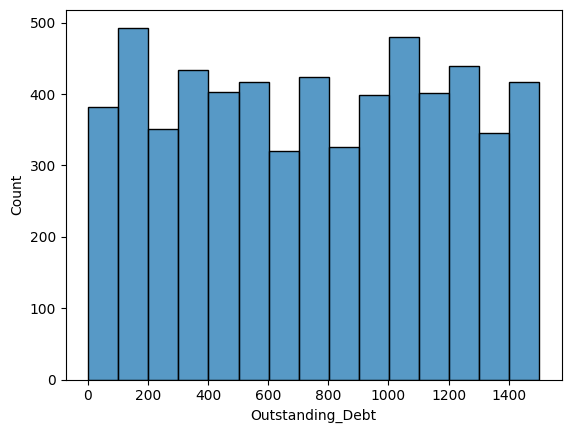

In [667]:
sns.histplot(data=score_df,x=feature,binwidth=100);

In [668]:
print(score_df[feature].skew())
score_df[feature].describe()

0.001884634387999919


count    6033.000000
mean      748.631533
std       435.090142
min         1.200000
25%       361.730000
50%       749.500000
75%      1127.260000
max      1498.410000
Name: Outstanding_Debt, dtype: float64

----------
#### Credit Utilization Ratio

38.550848    1
32.299049    1
25.494433    1
25.276850    1
29.159428    1
            ..
40.732332    1
38.645507    1
30.084573    1
39.285932    1
23.140640    1
Name: Credit_Utilization_Ratio, Length: 6033, dtype: int64


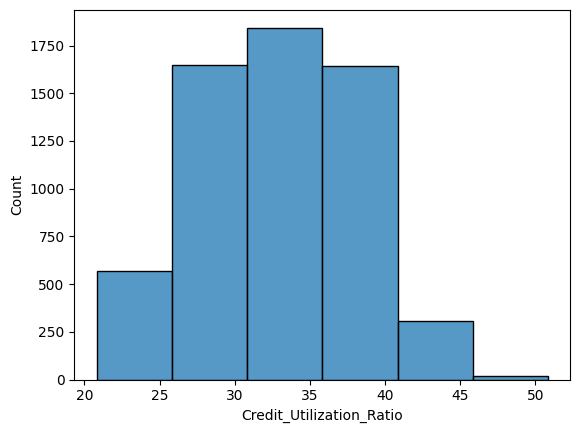

In [669]:
feature = "Credit_Utilization_Ratio"

print(score_df[feature].value_counts())

sns.histplot(data=score_df,x=feature,binwidth=5);


In [670]:
print(score_df[feature].skew())
score_df[feature].describe()

0.04230862453074467


count    6033.000000
mean       32.981718
std         5.165356
min        20.832487
25%        28.850073
50%        33.031457
75%        37.130395
max        49.564519
Name: Credit_Utilization_Ratio, dtype: float64

----------
#### Credit_History_Age


Note: Later removed this feature, as it has alot of unique classes which 
caused issues with encoding and transforming the data

30 Years and 2 Months     40
30 Years and 4 Months     40
32 Years and 11 Months    39
18 Years and 4 Months     38
32 Years and 9 Months     37
                          ..
6 Years and 7 Months       1
6 Years and 9 Months       1
14 Years and 3 Months      1
10 Years and 11 Months     1
15 Years and 1 Months      1
Name: Credit_History_Age, Length: 295, dtype: int64


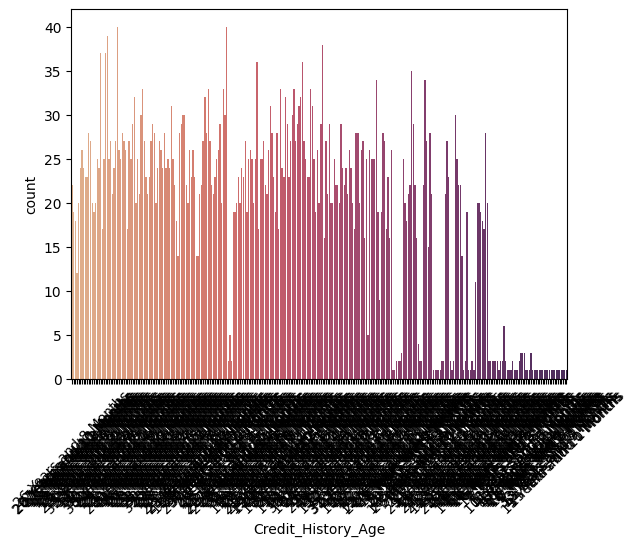

In [671]:
feature = "Credit_History_Age"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

----------
#### Payment of Min Amount

No     3663
Yes    1596
NM      774
Name: Payment_of_Min_Amount, dtype: int64


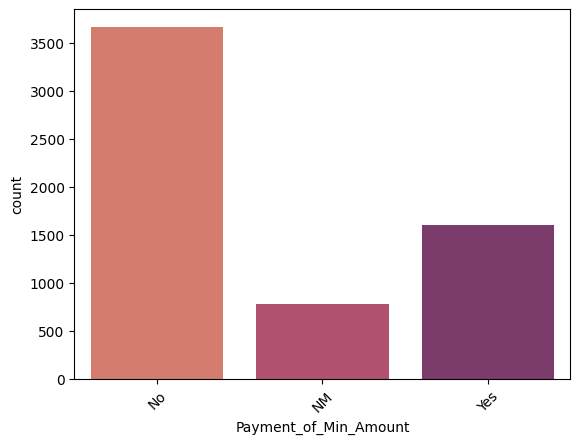

In [672]:
feature = "Payment_of_Min_Amount"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

In [673]:
score_df[feature] = score_df[feature].str.replace('NM','NO')
score_df[feature] = score_df[feature].str.replace('NO','No')



No     4437
Yes    1596
Name: Payment_of_Min_Amount, dtype: int64


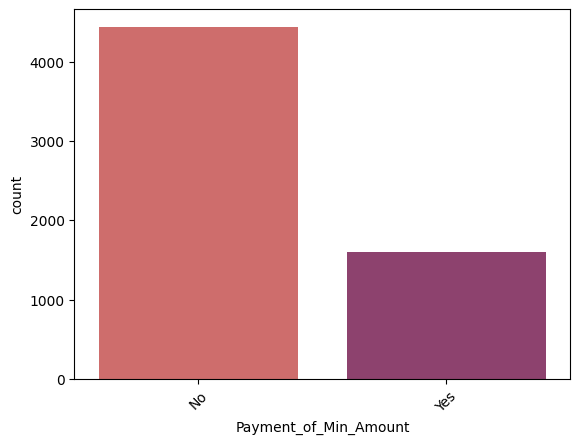

In [674]:
print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

----------
#### Total EMI per Month

36.817027       8
50.392823       8
12.841272       8
50.081045       8
92.613966       8
               ..
32451.000000    1
10808.000000    1
14224.000000    1
67963.000000    1
34.975457       1
Name: Total_EMI_per_month, Length: 1644, dtype: int64


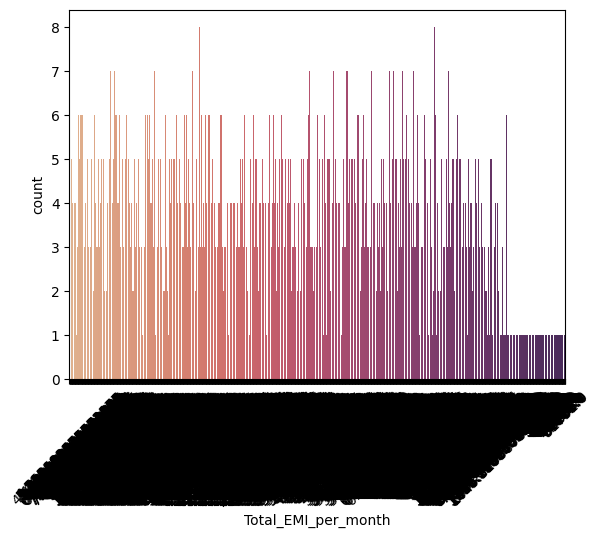

In [675]:
feature = "Total_EMI_per_month"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

In [676]:
print(score_df[feature].skew())
score_df[feature].describe()

6.983337182318545


count     6033.000000
mean      1354.968047
std       8148.926155
min          4.462837
25%         16.185940
50%         31.245931
75%         61.440036
max      81751.000000
Name: Total_EMI_per_month, dtype: float64

In [685]:
score_df = score_df[(score_df[feature] >= 0) & (score_df[feature] <= 120)]
print(score_df[feature].skew())
score_df[feature].describe()

0.92531767576456


count    5605.000000
mean       37.103325
std        26.636407
min         4.462837
25%        15.430221
50%        27.724981
75%        54.219664
max       117.658681
Name: Total_EMI_per_month, dtype: float64

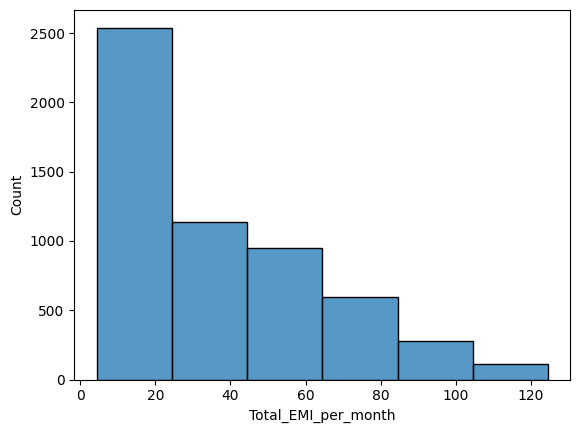

In [686]:

sns.histplot(data=score_df,x=feature,binwidth=20);


Text(0.5, 1.0, 'Rug / density Plot')

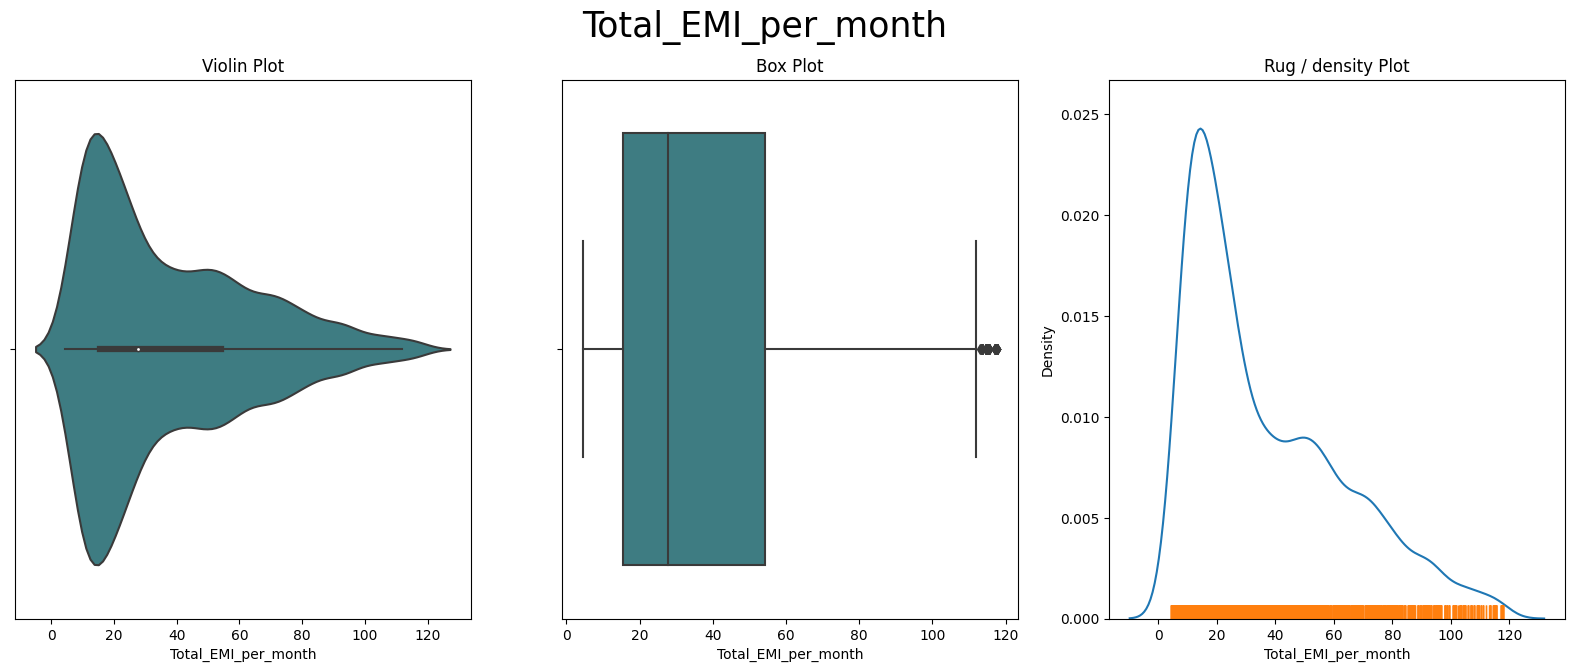

In [687]:
figure, axis = plt.subplots(1, 3,figsize=(20, 7))
figure.suptitle(feature, fontsize=25)

v = sns.violinplot(score_df, x=feature, ax=axis[0], palette='crest')
v.set_title("Violin Plot")

b = sns.boxplot(score_df, x=feature, ax=axis[1], palette='crest')
b.set_title("Box Plot")


r = sns.kdeplot(score_df, x=feature,ax=axis[2])
sns.rugplot(score_df, x=feature,ax=axis[2])
r.set_title("Rug / density Plot")

----------
#### Amount Invested Monthly

10000.000000    234
0.000000          5
40.391238         1
167.720948        1
47.991780         1
               ... 
59.189737         1
106.012179        1
102.868330        1
72.856515         1
450.646093        1
Name: Amount_invested_monthly, Length: 5141, dtype: int64


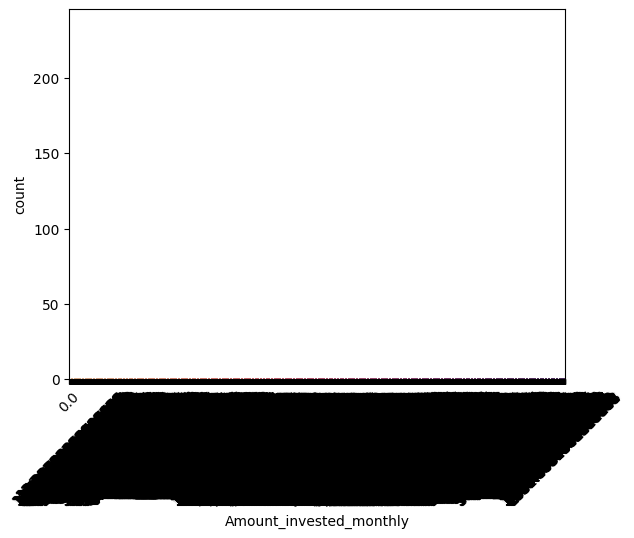

In [689]:
feature = "Amount_invested_monthly"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

In [690]:
print(score_df[feature].skew())
score_df[feature].describe()

4.390707752021502


count     5378.000000
mean       653.046587
std       2005.949156
min          0.000000
25%         86.599470
50%        155.611339
75%        315.662296
max      10000.000000
Name: Amount_invested_monthly, dtype: float64

In [691]:
score_df = score_df[(score_df[feature] >= 0) & (score_df[feature] <= 500)]
print(score_df[feature].skew())
score_df[feature].describe()

1.054003032567812


count    4586.000000
mean      163.733922
std       112.568727
min         0.000000
25%        78.047707
50%       131.668626
75%       219.960418
max       499.576408
Name: Amount_invested_monthly, dtype: float64

0.000000      5
202.764887    1
260.332678    1
316.058421    1
108.148610    1
             ..
107.027327    1
136.721709    1
72.758181     1
64.678460     1
450.646093    1
Name: Amount_invested_monthly, Length: 4582, dtype: int64


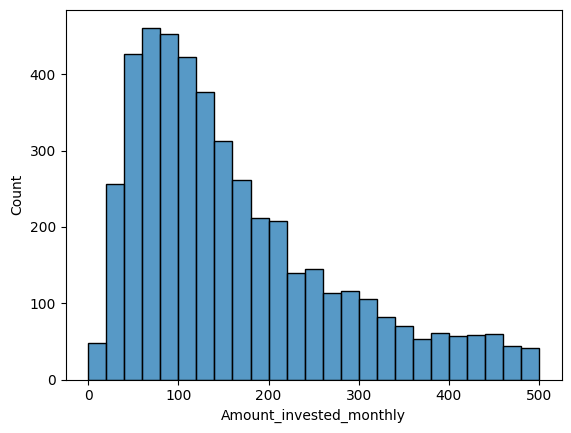

In [693]:
print(score_df[feature].value_counts())
sns.histplot(data=score_df,x=feature,binwidth=20);


----------
#### Payment Behavior

Low_spent_Small_value_payments      981
High_spent_Medium_value_payments    956
High_spent_Large_value_payments     819
Low_spent_Medium_value_payments     516
High_spent_Small_value_payments     512
Low_spent_Large_value_payments      474
!@9#%8                              328
Name: Payment_Behaviour, dtype: int64


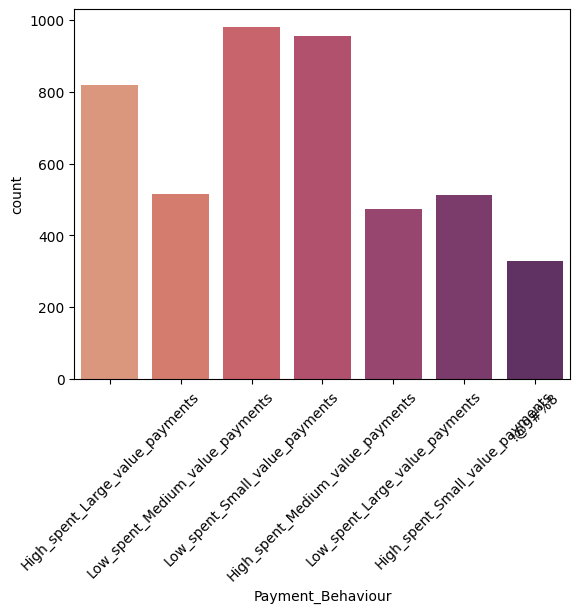

In [694]:
feature = "Payment_Behaviour"

print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

In [695]:
score_df = score_df[score_df[feature] != "!@9#%8"]

Low_spent_Small_value_payments      981
High_spent_Medium_value_payments    956
High_spent_Large_value_payments     819
Low_spent_Medium_value_payments     516
High_spent_Small_value_payments     512
Low_spent_Large_value_payments      474
Name: Payment_Behaviour, dtype: int64


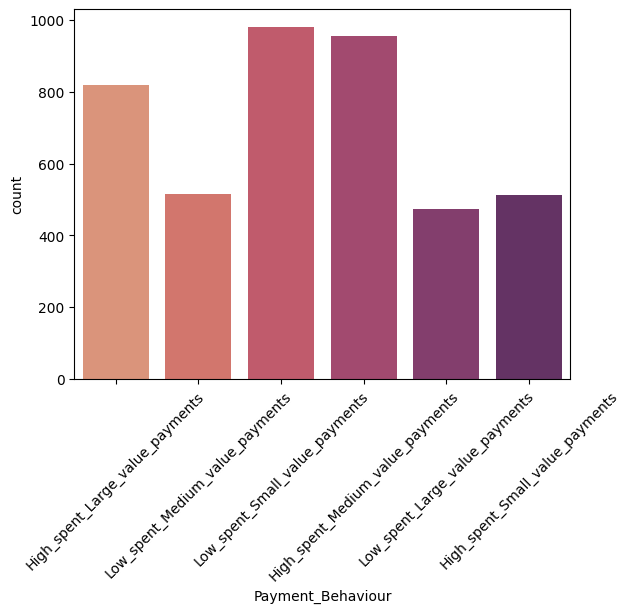

In [696]:
print(score_df[feature].value_counts())

sns.countplot(data=score_df,x=feature,palette="flare");
plt.xticks(rotation=45);

----------
#### Monthly Balance

In [704]:
feature = "Monthly_Balance"

print(score_df[feature].value_counts().to_string())

#It is completely unique values. Dropping this column

score_df.drop(feature, inplace=True, axis=1)


 4.845912e+02    1
 3.523594e+02    1
 8.447114e+02    1
 7.431555e+02    1
 7.130695e+02    1
 8.628964e+02    1
 5.455280e+02    1
 4.829664e+02    1
 4.910146e+02    1
 4.314815e+02    1
 4.220600e+02    1
 3.285195e+02    1
 2.256715e+02    1
 4.640787e+02    1
 2.300558e+02    1
 8.166069e+02    1
 7.276898e+02    1
 8.879249e+02    1
 6.724823e+02    1
 7.627059e+02    1
 7.497338e+02    1
 7.776379e+02    1
 5.663621e+02    1
 4.332215e+02    1
 5.572486e+02    1
 2.518842e+02    1
 2.448428e+02    1
 2.481029e+02    1
 3.985526e+02    1
 3.645917e+02    1
 2.760841e+02    1
 3.241825e+02    1
 3.298384e+02    1
 4.292890e+02    1
 3.012819e+02    1
 7.495768e+02    1
 8.620169e+02    1
 8.054948e+02    1
 3.059289e+02    1
 2.467073e+02    1
 3.086181e+02    1
 4.020745e+02    1
 2.206771e+02    1
 3.132936e+02    1
 1.312306e+03    1
 1.206921e+03    1
 1.090549e+03    1
 9.612186e+02    1
 1.005834e+03    1
 7.677548e+02    1
 1.058526e+03    1
 4.508239e+02    1
 7.225476e+0

C:\Users\Sameed\AppData\Local\Temp\ipykernel_8080\4226147253.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_df.drop(feature, inplace=True, axis=1)


In [705]:
score_df

Age     Occupation  Annual_Income  Monthly_Inhand_Salary  \
9       28        Teacher       34847.84            3037.986667   
11      28        Teacher       34847.84                    NaN   
12      28        Teacher       34847.84            3037.986667   
13      28        Teacher       34847.84            3037.986667   
14      28        Teacher       34847.84                    NaN   
...    ...            ...            ...                    ...   
99897   33   Entrepreneur       41329.56            3421.130000   
99899   33   Entrepreneur       41329.56            3421.130000   
99946   33  Media_Manager       59146.36            4908.863333   
99949   33  Media_Manager       59146.36            4908.863333   
99964   18         Lawyer       42903.79            3468.315833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
9                    2.0              4.0            6.0            1   
11                   2.0              4.0            6.0            1   
12                   2.0              4.0            6.0            1   
13                   2.0              4.0            6.0            1   
14                   2.0              4.0            6.0            1   
...                  ...              ...            ...          ...   
99897                2.0              3.0            7.0            1   
99899                2.0              3.0            7.0            1   
99946                2.0              5.0            6.0            1   
99949                3.0              6.0            6.0            1   
99964                2.0              4.0            6.0            1   

              Type_of_Loan  Delay_from_due_date  ...  Num_Credit_Inquiries  \
9      Credit-Builder Loan                    7  ...                   2.0   
11     Credit-Builder Loan                    3  ...                   2.0   
12     Credit-Builder Loan                    3  ...                   2.0   
13     Credit-Builder Loan                    3  ...                   2.0   
14     Credit-Builder Loan                    3  ...                   2.0   
...                    ...                  ...  ...                   ...   
99897        Not Specified                    2  ...                   2.0   
99899        Not Specified                    2  ...                   2.0   
99946        Personal Loan                    8  ...                   2.0   
99949        Personal Loan                    6  ...                   5.0   
99964        Not Specified                   14  ...                   1.0   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
9            Good            605.03                38.550848   
11           Good            605.03                39.182656   
12           Good            605.03                34.977895   
13           Good            605.03                33.381010   
14           Good            605.03                31.131702   
...           ...               ...                      ...   
99897        Good           1245.01                25.855366   
99899        Good           1245.01                30.657718   
99946        Good            418.03                35.750925   
99949        Good            418.03                24.975531   
99964        Good           1079.48                23.140640   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
9       26 Years and 8 Months                     No           18.816215   
11     26 Years and 10 Months                     No           18.816215   
12     26 Years and 11 Months                     No           18.816215   
13      27 Years and 0 Months                     No           18.816215   
14      27 Years and 1 Months                     No           18.816215   
...                       ...                    ...                 ...   
99897   23 Years and 4 Months                     No           20.553577   
99899   23 

Pairplot to overview correlations

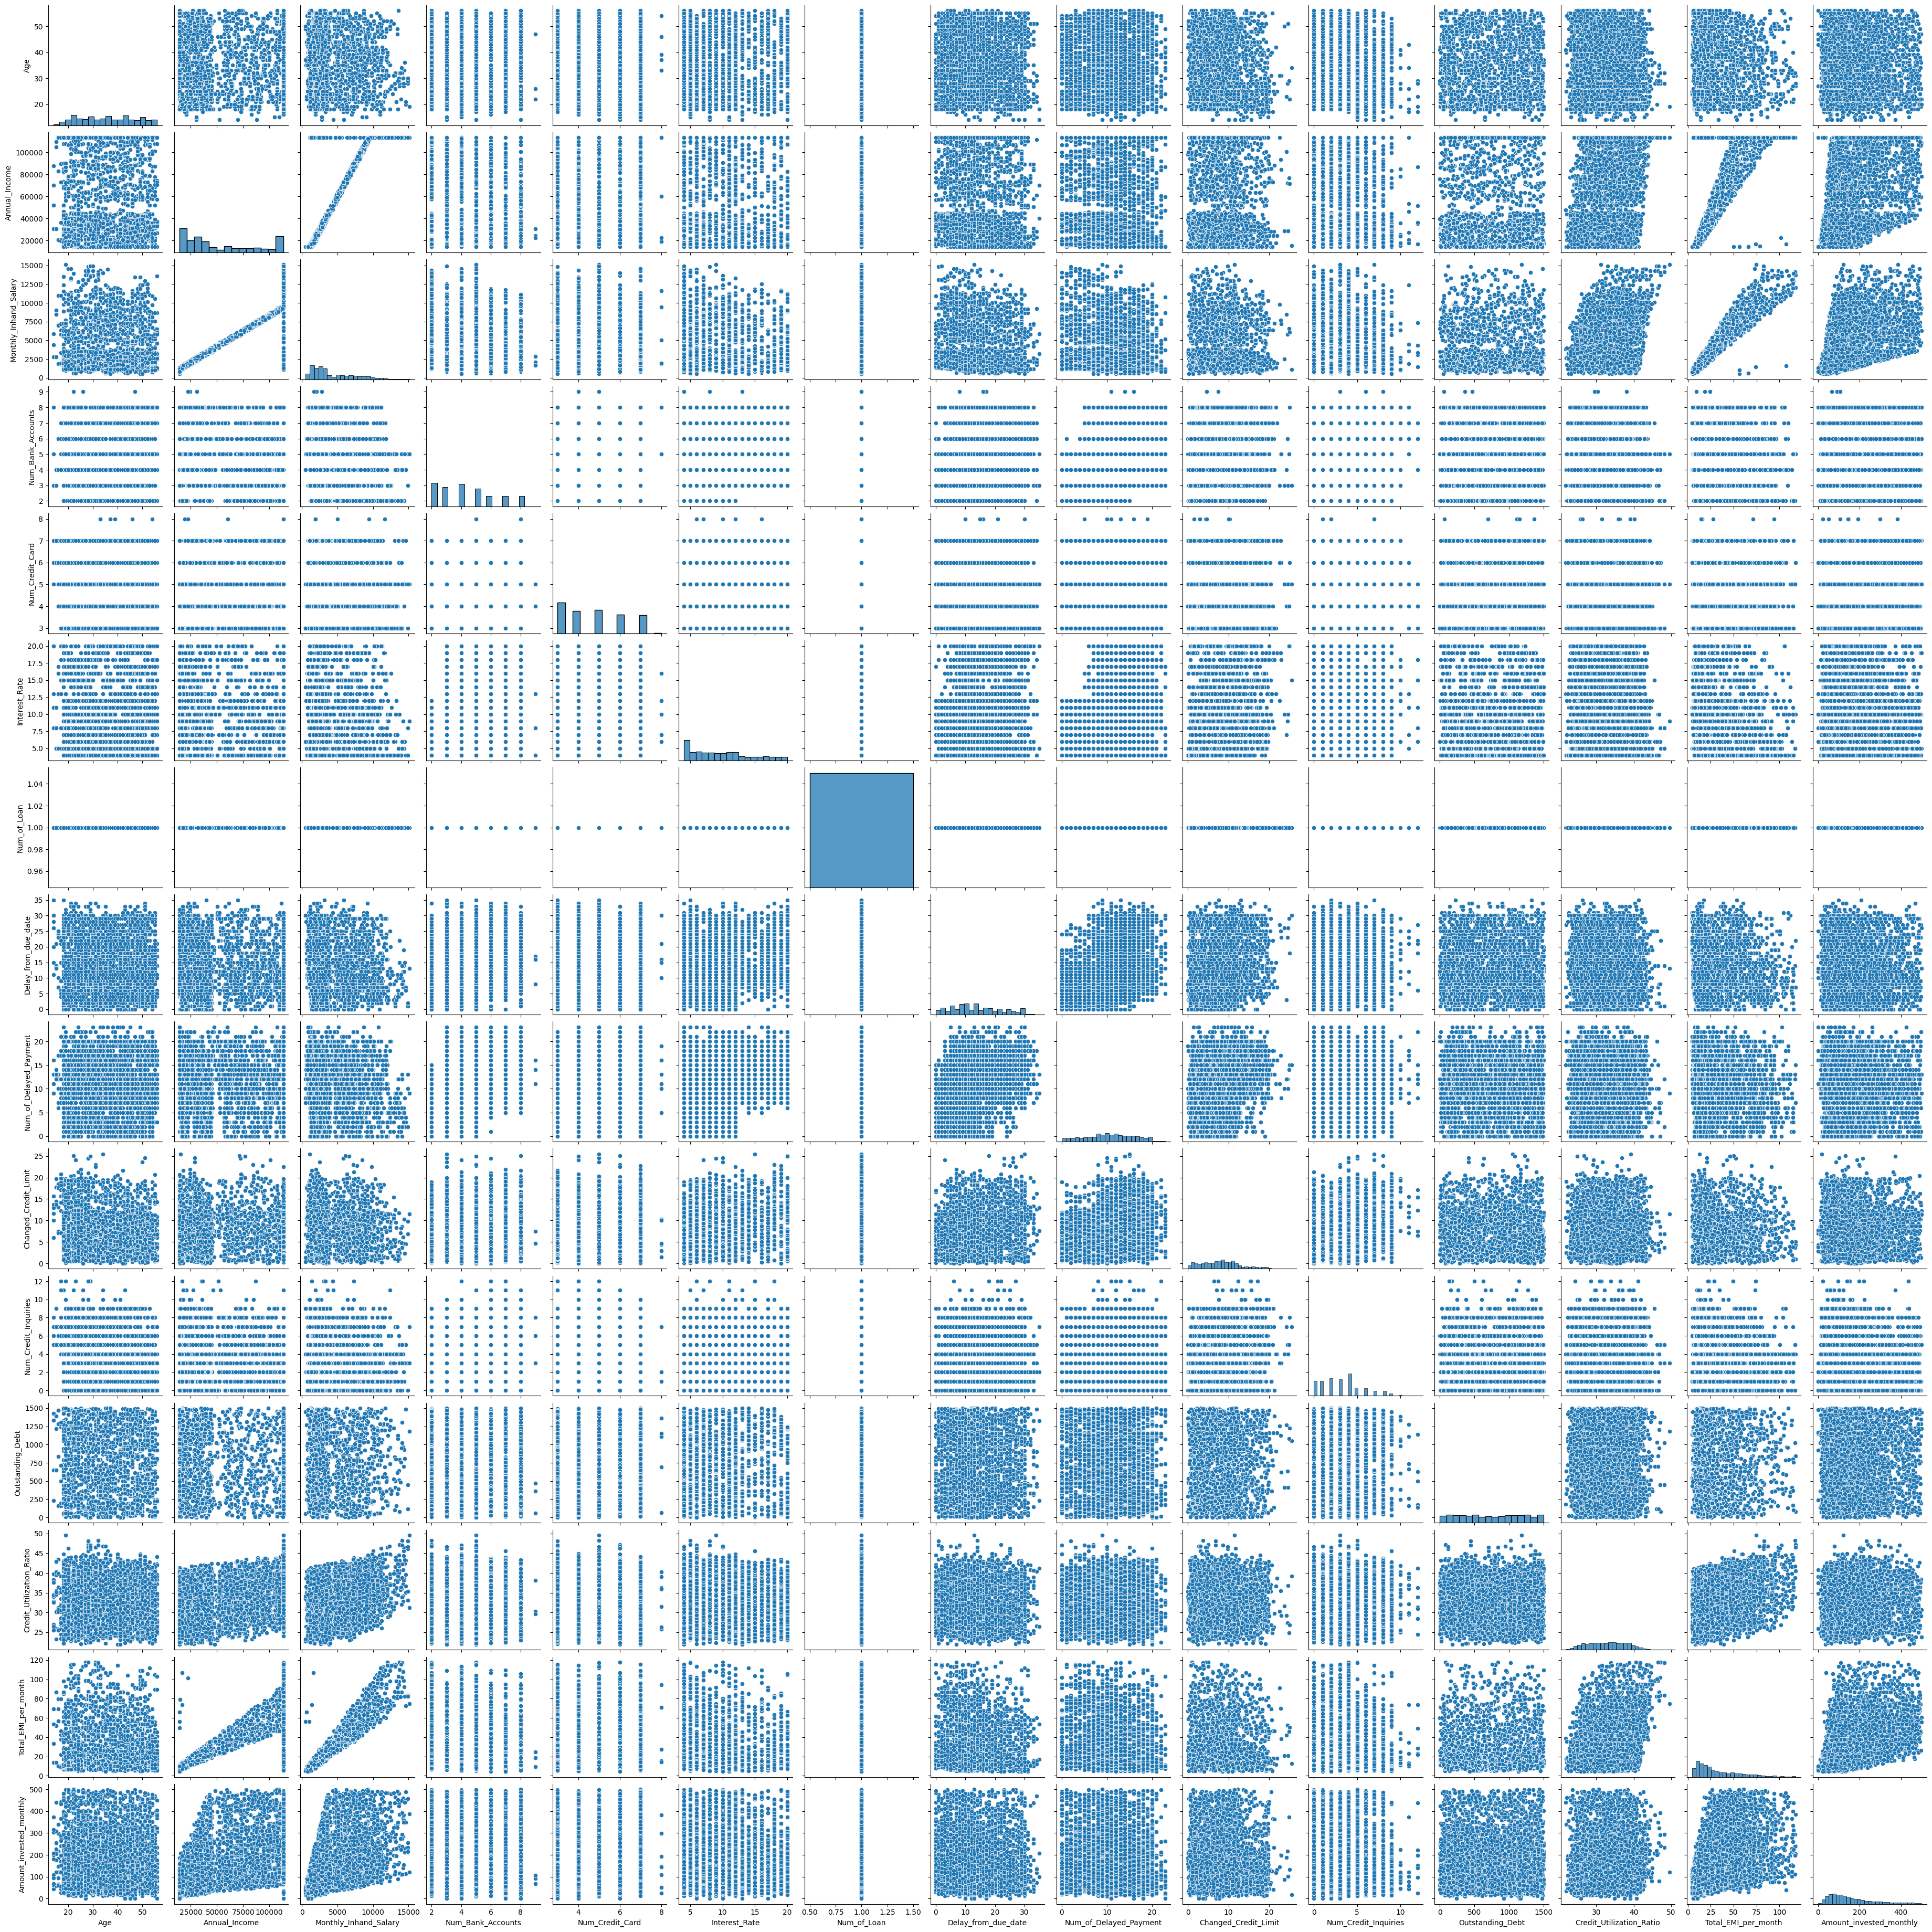

In [709]:
sns.pairplot(data=score_df)

--------------------------

#### Handling Null Values

In [707]:
print("Null Values for each column:\n")

for col in score_df:
    print(f"{col} -> {score_df[col].isna().sum()} ---> {score_df[col].isna().sum()/len(score_df[col])} %null ")

Null Values for each column:

Age -> 0 ---> 0.0 %null 
Occupation -> 0 ---> 0.0 %null 
Annual_Income -> 0 ---> 0.0 %null 
Monthly_Inhand_Salary -> 606 ---> 0.14232033818694223 %null 
Num_Bank_Accounts -> 0 ---> 0.0 %null 
Num_Credit_Card -> 0 ---> 0.0 %null 
Interest_Rate -> 0 ---> 0.0 %null 
Num_of_Loan -> 0 ---> 0.0 %null 
Type_of_Loan -> 0 ---> 0.0 %null 
Delay_from_due_date -> 0 ---> 0.0 %null 
Num_of_Delayed_Payment -> 0 ---> 0.0 %null 
Changed_Credit_Limit -> 0 ---> 0.0 %null 
Num_Credit_Inquiries -> 0 ---> 0.0 %null 
Credit_Mix -> 0 ---> 0.0 %null 
Outstanding_Debt -> 0 ---> 0.0 %null 
Credit_Utilization_Ratio -> 0 ---> 0.0 %null 
Credit_History_Age -> 407 ---> 0.09558478158759981 %null 
Payment_of_Min_Amount -> 0 ---> 0.0 %null 
Total_EMI_per_month -> 0 ---> 0.0 %null 
Amount_invested_monthly -> 0 ---> 0.0 %null 
Payment_Behaviour -> 0 ---> 0.0 %null 
Credit_Score -> 0 ---> 0.0 %null 


<Axes: >

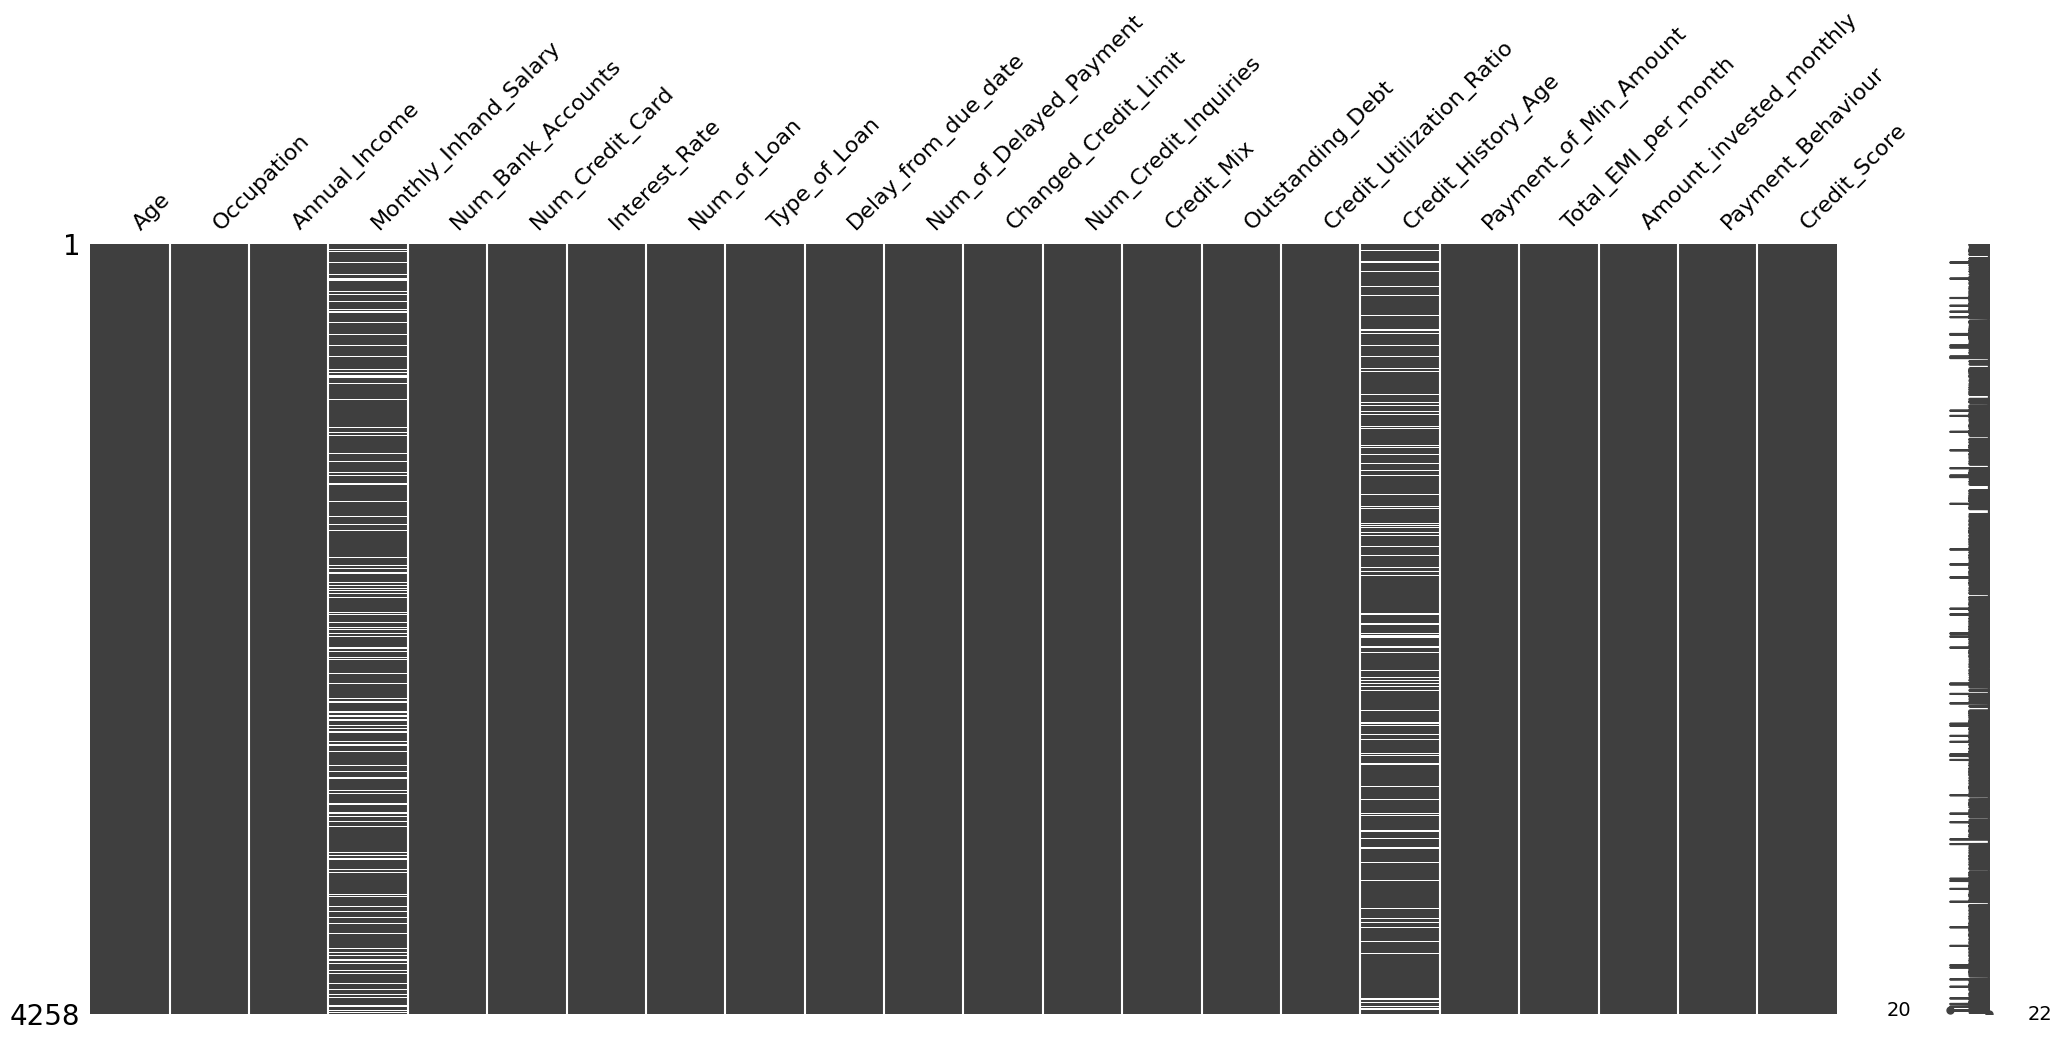

In [710]:
msno.matrix(score_df)


In [712]:
score_df['Monthly_Inhand_Salary'].fillna(score_df['Monthly_Inhand_Salary'].mean(), inplace = True) #Filled Nulls with mean

score_df['Credit_History_Age'].fillna(score_df['Credit_History_Age'].mode()[0], inplace = True) #Filled Nulls with mode

<Axes: >

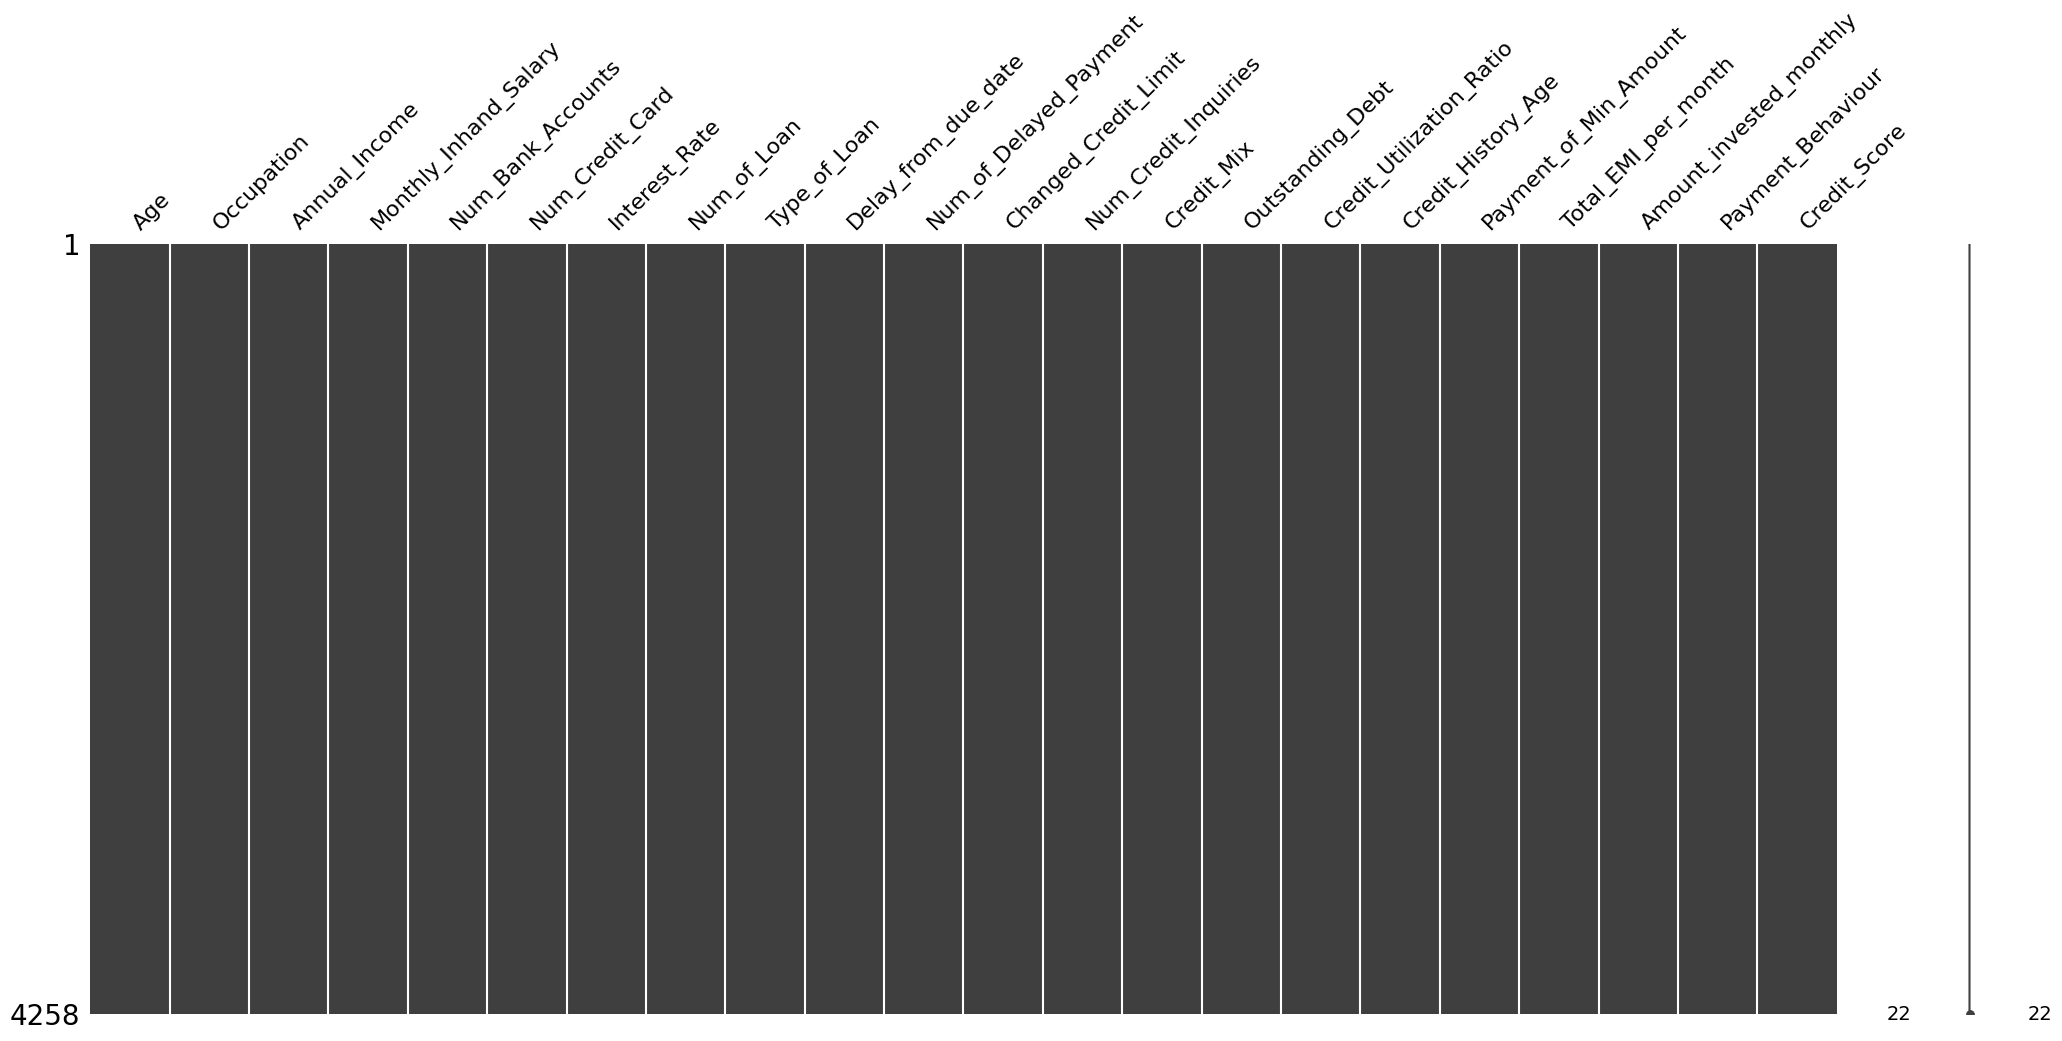

In [714]:
msno.matrix(score_df)

In [716]:
score_df

Age     Occupation  Annual_Income  Monthly_Inhand_Salary  \
9       28        Teacher       34847.84            3037.986667   
11      28        Teacher       34847.84            4493.863242   
12      28        Teacher       34847.84            3037.986667   
13      28        Teacher       34847.84            3037.986667   
14      28        Teacher       34847.84            4493.863242   
...    ...            ...            ...                    ...   
99897   33   Entrepreneur       41329.56            3421.130000   
99899   33   Entrepreneur       41329.56            3421.130000   
99946   33  Media_Manager       59146.36            4908.863333   
99949   33  Media_Manager       59146.36            4908.863333   
99964   18         Lawyer       42903.79            3468.315833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
9                    2.0              4.0            6.0            1   
11                   2.0              4.0            6.0            1   
12                   2.0              4.0            6.0            1   
13                   2.0              4.0            6.0            1   
14                   2.0              4.0            6.0            1   
...                  ...              ...            ...          ...   
99897                2.0              3.0            7.0            1   
99899                2.0              3.0            7.0            1   
99946                2.0              5.0            6.0            1   
99949                3.0              6.0            6.0            1   
99964                2.0              4.0            6.0            1   

              Type_of_Loan  Delay_from_due_date  ...  Num_Credit_Inquiries  \
9      Credit-Builder Loan                    7  ...                   2.0   
11     Credit-Builder Loan                    3  ...                   2.0   
12     Credit-Builder Loan                    3  ...                   2.0   
13     Credit-Builder Loan                    3  ...                   2.0   
14     Credit-Builder Loan                    3  ...                   2.0   
...                    ...                  ...  ...                   ...   
99897        Not Specified                    2  ...                   2.0   
99899        Not Specified                    2  ...                   2.0   
99946        Personal Loan                    8  ...                   2.0   
99949        Personal Loan                    6  ...                   5.0   
99964        Not Specified                   14  ...                   1.0   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
9            Good            605.03                38.550848   
11           Good            605.03                39.182656   
12           Good            605.03                34.977895   
13           Good            605.03                33.381010   
14           Good            605.03                31.131702   
...           ...               ...                      ...   
99897        Good           1245.01                25.855366   
99899        Good           1245.01                30.657718   
99946        Good            418.03                35.750925   
99949        Good            418.03                24.975531   
99964        Good           1079.48                23.140640   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
9       26 Years and 8 Months                     No           18.816215   
11     26 Years and 10 Months                     No           18.816215   
12     26 Years and 11 Months                     No           18.816215   
13      27 Years and 0 Months                     No           18.816215   
14      27 Years and 1 Months                     No           18.816215   
...                       ...                    ...                 ...   
99897   23 Years and 4 Months                     No           20.553577   
99899   23 

In [718]:
score_df.shape

(4258, 22)

In [808]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4258 entries, 9 to 99964
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4258 non-null   float64
 1   Occupation                4258 non-null   object 
 2   Annual_Income             4258 non-null   float64
 3   Monthly_Inhand_Salary     4258 non-null   float64
 4   Num_Bank_Accounts         4258 non-null   float64
 5   Num_Credit_Card           4258 non-null   float64
 6   Interest_Rate             4258 non-null   float64
 7   Num_of_Loan               4258 non-null   float64
 8   Type_of_Loan              4258 non-null   object 
 9   Delay_from_due_date       4258 non-null   float64
 10  Num_of_Delayed_Payment    4258 non-null   float64
 11  Changed_Credit_Limit      4258 non-null   float64
 12  Num_Credit_Inquiries      4258 non-null   float64
 13  Credit_Mix                4258 non-null   object 
 14  Outstan

In [809]:
score_df.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  4258.000000    4258.000000            4258.000000        4258.000000   
mean      0.515797       0.387159               0.273224           0.343421   
std       0.262967       0.344032               0.202670           0.273447   
min       0.000000       0.000000               0.000000           0.000000   
25%       0.285714       0.089703               0.117873           0.142857   
50%       0.500000       0.248772               0.226063           0.285714   
75%       0.738095       0.691338               0.373666           0.571429   
max       1.000000       1.000000               1.000000           1.000000   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
count      4258.000000    4258.000000       4258.0          4258.000000   
mean          0.350399       0.356549          0.0             0.395397   
std           0.284930       0.298415          0.0             0.234956   
min           0.000000       0.000000          0.0             0.000000   
25%           0.000000       0.062500          0.0             0.200000   
50%           0.400000       0.312500          0.0             0.371429   
75%           0.600000       0.562500          0.0             0.571429   
max           1.000000       1.000000          0.0             1.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count             4258.000000           4258.000000           4258.000000   
mean                 0.463782              0.319208              0.273074   
std                  0.238822              0.185500              0.199503   
min                  0.000000              0.000000              0.000000   
25%                  0.304348              0.174784              0.083333   
50%                  0.478261              0.313826              0.250000   
75%                  0.652174              0.437058              0.333333   
max                  1.000000              1.000000              1.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
count       4258.000000               4258.000000          4258.000000   
mean           0.500524                  0.400097             0.254780   
std            0.293424                  0.186488             0.218216   
min            0.000000                  0.000000             0.000000   
25%            0.239252                  0.248134             0.084772   
50%            0.501813                  0.400771             0.172399   
75%            0.761590                  0.549801             0.385597   
max            1.000000                  1.000000             1.000000   

       Amount_invested_monthly  
count              4258.000000  
mean                  0.329440  
std                   0.225711  
min                   0.000000  
25%                   0.157385  
50%                   0.265767  
75%                   0.442320  
max                   1.000000

----------
#### Creating a deep copy of the dataframe

In [721]:
#Creating a deep copy before scaling and encoding

backup = score_df.copy()

----------
#### Scaling

In [810]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = []

for cols in score_df:
    if(score_df[cols].dtypes == np.int64 or score_df[cols].dtypes == np.float64):
        numerical_features.append(cols)


score_df[numerical_features] = scaler.fit_transform(score_df[numerical_features])

In [816]:
score_df = score_df.reset_index()
score_df

level_0  index       Age     Occupation  Annual_Income  \
0           0      9  0.333333        Teacher       0.207826   
1           1     11  0.333333        Teacher       0.207826   
2           2     12  0.333333        Teacher       0.207826   
3           3     13  0.333333        Teacher       0.207826   
4           4     14  0.333333        Teacher       0.207826   
...       ...    ...       ...            ...            ...   
4253     4253  99897  0.452381   Entrepreneur       0.273362   
4254     4254  99899  0.452381   Entrepreneur       0.273362   
4255     4255  99946  0.452381  Media_Manager       0.453506   
4256     4256  99949  0.452381  Media_Manager       0.453506   
4257     4257  99964  0.095238         Lawyer       0.289279   

      Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                  0.173368           0.000000              0.2   
1                  0.273224           0.000000              0.2   
2                  0.173368           0.000000              0.2   
3                  0.173368           0.000000              0.2   
4                  0.273224           0.000000              0.2   
...                     ...                ...              ...   
4253               0.199647           0.000000              0.0   
4254               0.199647           0.000000              0.0   
4255               0.301688           0.000000              0.4   
4256               0.301688           0.142857              0.6   
4257               0.202884           0.000000              0.2   

      Interest_Rate  Num_of_Loan  ... Num_Credit_Inquiries  Credit_Mix  \
0            0.1250          0.0  ...             0.166667        Good   
1            0.1250          0.0  ...             0.166667        Good   
2            0.1250          0.0  ...             0.166667        Good   
3            0.1250          0.0  ...             0.166667        Good   
4            0.1250          0.0  ...             0.166667        Good   
...             ...          ...  ...                  ...         ...   
4253         0.1875          0.0  ...             0.166667        Good   
4254         0.1875          0.0  ...             0.166667        Good   
4255         0.1250          0.0  ...             0.166667        Good   
4256         0.1250          0.0  ...             0.416667        Good   
4257         0.1250          0.0  ...             0.083333        Good   

      Outstanding_Debt  Credit_Utilization_Ratio      Credit_History_Age  \
0             0.403303                  0.601784   26 Years and 8 Months   
1             0.403303                  0.624628  26 Years and 10 Months   
2             0.403303                  0.472599  26 Years and 11 Months   
3             0.403303                  0.414861   27 Years and 0 Months   
4             0.403303                  0.333534   27 Years and 1 Months   
...                ...                       ...                     ...   
4253          0.830752                  0.142760   23 Years and 4 Months   
4254          0.830752                  0.316396   23 Years and 6 Months   
4255          0.278404                  0.500549   20 Years and 3 Months   
4256          0.278404                  0.110948   20 Years and 6 Months   
4257          0.720193                  0.044605   28 Years and 5 Months   

     Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                       No             0.126801                 0.080851   
1                       No             0.126801                 0.198781   
2                       No             0.126801                 0.260451   
3                       No             0.126801                 0.087028   
4                       No             0.126801                 0.140322   
...                    ...                  ...                      ...   
4253                    No             0.142150                 0.361750   
4254                  

----------
#### Creating Splits

In [918]:
x = score_df.drop(['Credit_Score'], axis=1)
x = x.iloc[:,2:]
y = score_df["Credit_Score"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,stratify=y)

In [920]:
categorical_features = []

for cols in score_df:
    if(score_df[cols].dtypes != np.int64 and score_df[cols].dtypes != np.float64):
        categorical_features.append(cols)

categorical_features = categorical_features[:-1]


NOTE: As previously mentioned, removed cause it has too many unique classes

In [921]:
x_train = x_train.drop(['Credit_History_Age'], axis=1)
x_test = x_test.drop(['Credit_History_Age'], axis=1)

Encoding

In [922]:
le = preprocessing.LabelEncoder()

for cols in x_train:
    if(cols in categorical_features):        
        x_train[cols] = le.fit_transform(x_train[cols])
        x_test[cols] = le.transform(x_test[cols])

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


---------
#### Exporting the splits as CSVs

In [926]:
x_train.to_csv("Dataset//x_train.csv", encoding='utf-8', index=False)
y_train = pd.DataFrame(y_train)

y_train.to_csv("Dataset//y_train.csv", encoding='utf-8', index=False)

x_test.to_csv("Dataset//x_test.csv", encoding='utf-8', index=False)
y_test = pd.DataFrame(y_test)

y_test.to_csv("Dataset//y_test.csv", encoding='utf-8', index=False)

